<h3>Importing Relevant Libraries:</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('phones_data.csv')
data.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [3]:
# popularity of phones lie in the range 1-1244:
# screen size is in inches:
data = data.drop(['Unnamed: 0', 'model_name'], axis=1)
data['popularity'] = data['popularity']/1224
data.head()

,brand_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,Android,0.344771,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,Android,0.263889,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,Android,0.244281,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,Android,0.234477,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,Android,0.855392,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [4]:
data.columns

Index(['brand_name', 'os', 'popularity', 'best_price', 'lowest_price',
       'highest_price', 'sellers_amount', 'screen_size', 'memory_size',
       'battery_size', 'release_date'],
      dtype='object')

In [5]:
data.info()
# there are a lot of missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1224 non-null   object 
 1   os              1027 non-null   object 
 2   popularity      1224 non-null   float64
 3   best_price      1224 non-null   float64
 4   lowest_price    964 non-null    float64
 5   highest_price   964 non-null    float64
 6   sellers_amount  1224 non-null   int64  
 7   screen_size     1222 non-null   float64
 8   memory_size     1112 non-null   float64
 9   battery_size    1214 non-null   float64
 10  release_date    1224 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 105.3+ KB


In [6]:
# numerical and categorical features of data i.e. which are of measurement level 'interval' or 'ratio':
num_feat = [feat for feat in data.columns if data[feat].dtype != 'object']
cat_feat = [feat for feat in data.columns if data[feat].dtype == 'object']

In [7]:
# all the numerical features:
num_feat

['popularity',
 'best_price',
 'lowest_price',
 'highest_price',
 'sellers_amount',
 'screen_size',
 'memory_size',
 'battery_size']

In [8]:
# all the categorical features which are of measurement level 'ordinal' and 'nominal':
cat_feat

['brand_name', 'os', 'release_date']

In [9]:
# Proportion of Missing Values of Features in the data in percentages:
miss_val = data.isnull().sum()
miss_val/len(data)*100

brand_name         0.000000
os                16.094771
popularity         0.000000
best_price         0.000000
lowest_price      21.241830
highest_price     21.241830
sellers_amount     0.000000
screen_size        0.163399
memory_size        9.150327
battery_size       0.816993
release_date       0.000000
dtype: float64

<h3>Analysis Of Missing Values:</h3>
<p><ol>
<li>As we know, the very first thing that we do when we begin a Machine Learning Project or a Data Science Project is deal with the missing values. This is the very first preprocessing step which we perform.</li>
    <li>Since from the above information of data we can easily observe that there are multiple features which have missing values and they also possess missing values to a larger scale i.e. up to 21% of original data. Thus for all the missing values of a feature, neither can we drop them, nor we can use some simple statistic measure to replace all the values, rather we need to think of some special way in which we can replace them as accurate as possible.</li>
    <li>The most simplest way that I can think of is first creating a new data using the existing data where records corresponding to the null values will be dropped and then we can try find different patterns in the data or try to look after significant features with respect to the feature whose missing values are to be dealt with and using regression model, we can deal with the missing values.</li>
    <li>If we drop all the missing values in order to create a new dataset free of 'NaN', the rows would be 780 and the original data contained 1224 rows, thus, we will be removing 37% of data which is large enough but as far as choosing the right way to deal with the missing values, we need to opt this technique.</li>
</ol></p>


In [10]:
# Features which contain missing values:
more_miss_feat = [] # contains features which have higher missing values
less_miss_feat = [] # contains features which have less missing values
miss_val_prop = {} # contains the proportion of null values for each of the feature in percentages
for key, val in dict(miss_val).items():
    if val  > 12:
        more_miss_feat.append(key)
        miss_val_prop[key] = val/len(data)*100
    elif val !=0 and val < 12:
        less_miss_feat.append(key)
        miss_val_prop[key] = val/len(data)*100
        
print(more_miss_feat)
print(less_miss_feat)
# where screen_size and battery_size have quite less amount of missing values and different techniques could be used for 
# dealing their missing values

['os', 'lowest_price', 'highest_price', 'memory_size']
['screen_size', 'battery_size']


<h3>Analysing data which does not have any null values present in it:</h3>

In [11]:
# creating the new data which does not hava any null values.
data_nonull = data.dropna()
data_nonull.head()

,brand_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,Android,0.344771,1690.0,1529.0,1819.0,36,5.0,8.0,2000.0,10-2020
1,ALCATEL,Android,0.263889,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
2,ALCATEL,Android,0.244281,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
3,ALCATEL,Android,0.234477,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
5,Honor,Android,0.058007,10865.0,10631.0,11099.0,2,5.8,64.0,3400.0,6-2018


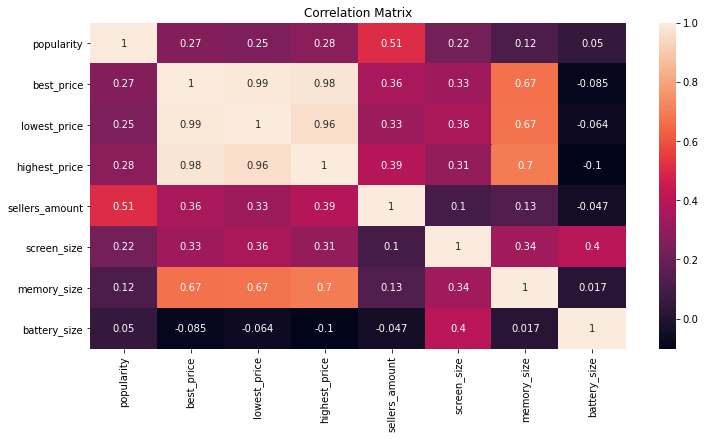

In [12]:
# trying to find the correlation and plotting it through heatmap:
corr_data = data_nonull.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_data, annot=True)
plt.title('Correlation Matrix')
plt.savefig('Very First Correlation Plot with highest and lowest price')

<h3>Analysis of Correlation:</h3>
<p><ol>
<li>It can be clearly observed that the features 'Best Price', 'Highest Price' and 'Lowest Price' are very highly correlated and thus while creating a regression model later, we might encounter the problem of <strong> 'MultiCollinearity' </strong>where one independent feature is highly correlated with another independent feature and it results in 2 major problems:
    <ol>
    <li>Generates <strong>correlated errors </strong> and hence the assumption of linear regression <strong>'No Autocorrelation among the error or residuals' is violated.</strong></li>
    <li>It also <strong>affects the significance of other independent features</strong> with respect to the dependent feature. Thus, we do not get idea of those features which are significant predictors of the dependent feature.</li>
</ol></li>
    <li>Thus, we need to drop any of the 2 features related to Price and I would consider only the 'best_price' and would simply like to drop the 'lowest_price' and 'highest_price' since their correlation is greater than 0.98 and hence, all the 3 features correspond to just a single property.</li>
    <li>Hence drop <strong>'highest_price' and 'lowest_price'</strong> which also deals with the problem of missing values since out of all the features which had a lot of missing data, these two features were part of this.</li>
    <li>Hence, we can simply get rid of the 2 features i.e. 'highest_price' and 'lowest_price'.</li>
</ol></p>

<h3>Dealing with the Missing Values of 'highest_price' and 'lowest_price':</h3>

In [13]:
# Removing the 2 features i.e. 'highest_price' and 'lowest_price' from both of our datasets:
data = data.drop(['highest_price', 'lowest_price'], axis=1)
data_nonull = data_nonull.drop(['highest_price', 'lowest_price'], axis=1)

In [14]:
data_nonull.head()

,brand_name,os,popularity,best_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,Android,0.344771,1690.0,36,5.0,8.0,2000.0,10-2020
1,ALCATEL,Android,0.263889,1803.0,36,5.0,16.0,2000.0,9-2020
2,ALCATEL,Android,0.244281,1803.0,36,5.0,16.0,2000.0,9-2020
3,ALCATEL,Android,0.234477,1803.0,36,5.0,16.0,2000.0,9-2020
5,Honor,Android,0.058007,10865.0,2,5.8,64.0,3400.0,6-2018


In [15]:
# Removing the 2 features from the list i.e. 'more_miss_feat' which correspond to the features having higher missing values:
more_miss_feat.remove('highest_price')
more_miss_feat.remove('lowest_price')
more_miss_feat

['os', 'memory_size']

In [16]:
# removing these two features from num_feat:
num_feat.remove('highest_price')
num_feat.remove('lowest_price')
num_feat

['popularity',
 'best_price',
 'sellers_amount',
 'screen_size',
 'memory_size',
 'battery_size']

In [17]:
# Features which contain less missing values:
less_miss_feat

['screen_size', 'battery_size']

In [18]:
# accounts for the proportion of missing values for each feature in percentages:
miss_val_prop

{'os': 16.094771241830067,
 'lowest_price': 21.241830065359476,
 'highest_price': 21.241830065359476,
 'screen_size': 0.16339869281045752,
 'memory_size': 9.15032679738562,
 'battery_size': 0.8169934640522877}

<h2>Data Cleaning and Preprocessing:</h2>

<h3>Dealing with the missing values of 'Memory_size' and 'battery_size':</h3>
<p>Dealing with the missing values of the features which had quite less proportion of missing values i.e. 'memory_size', 'battery_size' which have less than 1% missing values of the original data will be easy and straightforward. Since, the proportion of missing values in these 2 numerical features is less than 1% of original data, hence we can use some descriptive statistical value to replace all the missing values.</p>

In [19]:
# function to identify the outliers or extreme values in a feature:

def find_outliers(data, feature, ymax=0.8):
    
    # if it contains any null values:
    if data[feature].isnull().sum() > 0:
        data_new = data[data[feature].notnull()] # only considering the data which contains not even a single null value for that feature
    else:
        data_new = data
        
    q1 = np.percentile(data_new[feature], 25) # 25th percentile
    q3 = np.percentile(data_new[feature], 75) # 75th percentile
    iqr = q3-q1
    upper_threshold = q3 + 1.5*iqr
    lower_threshold = q1 - 1.5*iqr
    
    # Valid Range for no outliers
    print('All the data values should be within Lower Thresh i.e. {} and Upper Thresh. i.e. {}'.format(lower_threshold, upper_threshold))
    upper_outl = len(data_new[data_new[feature] > upper_threshold])
    lower_outl = len(data_new[data_new[feature] < lower_threshold])
    print('Number of Outliers towards the Upper Whisker: {} with Proportion of outliers = {} %'.format(upper_outl, upper_outl/len(data_new)*100))
    print('Number of Outliers towards the Lower Whisker: {} with Proportion of outliers = {} %'.format(lower_outl, lower_outl/len(data_new)*100))
    
    # median of the feature:
    median = np.percentile(data_new[feature], 50)
    print('Median of {}: {}'.format(feature, median))
    
    # plotting the feature with its outliers:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(data_new[feature])
    plt.vlines(x=lower_threshold, ymin=0, ymax=ymax)
    plt.vlines(x=upper_threshold, ymin=0, ymax=ymax)
    plt.fill_betweenx(x1= lower_threshold, x2= upper_threshold, y=np.linspace(0, ymax, 10), color='green', alpha=0.2)
    plt.grid(True, alpha=0.4)
    plt.title('Distribution of '+feature)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_new[feature], color='darkred')
    plt.grid(True, alpha=0.4)
    plt.title('Boxplot of '+feature)

All the data values should be within Lower Thresh i.e. 3.306250000000001 and Upper Thresh. i.e. 8.25625
Number of Outliers towards the Upper Whisker: 0 with Proportion of outliers = 0.0 %
Number of Outliers towards the Lower Whisker: 197 with Proportion of outliers = 16.121112929623568 %
Median of screen_size: 6.0


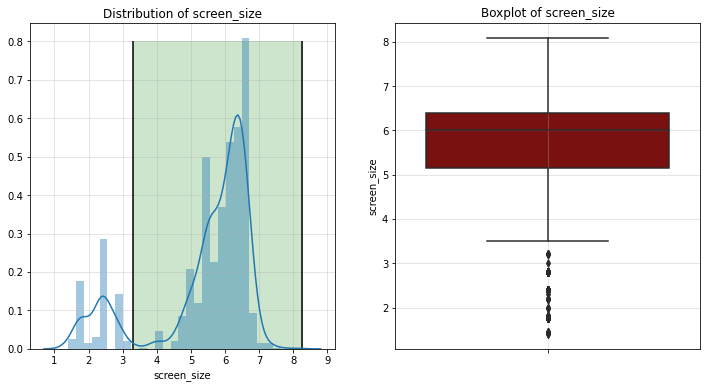

In [20]:
# distribution and outliers of 'Screen Size' of the whole data:
find_outliers(data, 'screen_size')

<h3>Analysis of 'Screen Size':</h3>
<p><ol>
    <li>From, the above graph, we can simply understand that 16.11% of data is considered as outliers towards the lower whisker.</li>
<li>We can say most of the mobile phones have 6.5 inch as their screen size.</li>
    <li>Some people also have screen size of 2.1 inch and the graph seems to be bimodal.</li>
    <li>For now, since there are just 2 missing values, thus<strong> we would like to replace the missing values with the median of all the screen size values </strong>, since it contains outliers within it.</li>
    <li>From the boxplot, we can clearly observe that the median of 'screen_size' is 6.125</li>
</ol></p>

All the data values should be within Lower Thresh i.e. 650.0 and Upper Thresh. i.e. 6650.0
Number of Outliers towards the Upper Whisker: 25 with Proportion of outliers = 2.059308072487644 %
Number of Outliers towards the Lower Whisker: 19 with Proportion of outliers = 1.5650741350906094 %
Median of battery_size: 3687.0


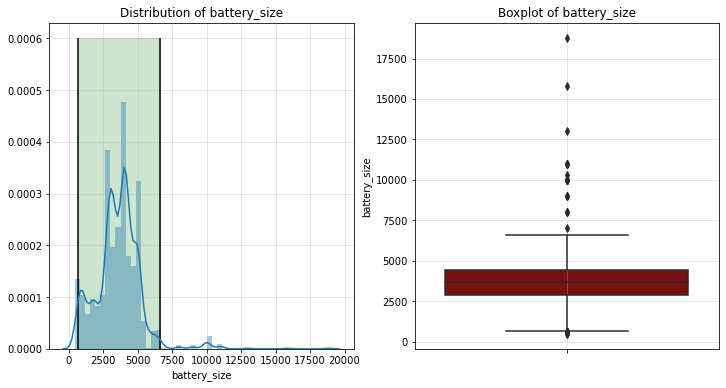

In [21]:
# distribution and outliers in 'battery_size' of original data:
find_outliers(data, 'battery_size', ymax=0.0006)

<h3>Analysis of 'Battery Size':</h3>
<p><ol>
<li>From the above distribution, we can infer that outliers are present on both the sides. Although the outliers are less in number. More specifically, 2.1% of data is considered as outlier towards the upper whisker and 1.56% of data is considered to be the outliers towards the lower scale.</li>
    <li>From the distribution, most of the phones tend to have battery of in between 2500mAh to 4500mAh.</li>
    <li>Since, the data seems to have some outliers, thus the <strong>missing values should be replaced by the median value of the entire data of 'battery_size'</strong>.</li>
</ol></p>

In [22]:
# Since 2 features i.e. 'battery_size' and 'screen_size' have less than 1% of the data as outliers, thus we would simply
# compute the median value of the feature and replace that for all the missing values. 
def miss_val_deal(data, feature):
    lst_new_feat = [] # for storing the new values or updated values
    
    # Removing the missing values and then computing the median:
    data_new = data[data[feature].notnull()] # only considering the data which contains not even a single null value for that feature
    median = np.percentile(data_new[feature], 50)
    
    data[feature] = np.where(data[feature].isnull(), median, data[feature])
    print('Missing Values for updated feature values --> ', data[feature].isnull().sum())

In [23]:
# missing values of 'screen_size' resolved:
miss_val_deal(data, 'screen_size')

Missing Values for updated feature values -->  0


In [24]:
# missing values of 'battery_size' resolved:
miss_val_deal(data, 'battery_size')

Missing Values for updated feature values -->  0


In [25]:
# hence now we are left with only 2 features to deal with their missing values:
data.isnull().sum()

brand_name          0
os                197
popularity          0
best_price          0
sellers_amount      0
screen_size         0
memory_size       112
battery_size        0
release_date        0
dtype: int64

<h3>Dealing with Features which have large missing values:</h3>

<h4>Treatment of Missing Values of 'OS':</h4>

<h4>One-Way Anova:</h4>
<p> This will allow us to investigate the different numerical featues which are significantly affecting 'OS'. In this way, we will be getting to know the important numerical features which should be investigated further so as to deal with the missing values of 'os'.</p>

In [26]:
from scipy.stats import f_oneway

# One-Way Anova Function:
def anova_analysis(data, cat_feature, num_feat):
    results = {} # for storing the p-value:
    for numerical_feature in num_feat:
        grouped_data_category = []
        for category in list(data[cat_feature].unique()):
            data_category = data[data[cat_feature]==category][numerical_feature]
            grouped_data_category.append(data_category)
        #print(len(grouped_data_category)) # to ensure if evrything is correct # debugger
        f_stats, p_val = f_oneway(*grouped_data_category)
        results[numerical_feature] = (f_stats, p_val)
        
    results_df = np.transpose(pd.DataFrame(results))
    results_df.columns=['F-Statistic', 'P-Value']
    print('ANOVA TABLE for {}'.format(cat_feature))
    return results_df

In [27]:
# For 'OS' based upon the data_nonull:
anova_analysis(data_nonull, 'os', num_feat)

ANOVA TABLE for os


,F-Statistic,P-Value
popularity,6.976032,1.612921e-05
best_price,54.856146,9.601779e-41
sellers_amount,37.950444,5.085730e-29
screen_size,26.624711,1.024604e-20
memory_size,12.375231,9.232343e-10
battery_size,31.316249,3.354328e-24


<h4>Analysis of Anova Table:</h4>
<p><ol>
<li>We can observe that at least one of the category of 'OS' has different mean than the other categories with repsect to all the numerical features since it can be clearly observed that p-values for 'OS' with respect to all the numerical features are less than 0.05 and hence we can can conclude that the null hypothesis is rejected.</li>
    <li>Null Hypothesis means that mean of each category of a categorical feature with respect to the numerical feature is the same.</li>
    <li>Thus, it means the variance of all the numerical features is being explained by the categorical feature 'OS'. Hence, they are significant predictors of 'OS'.</li>
    <li>But, if you think practically it does not really matter that the screen_size will determine the 'OS'. Rather, OS is the property of each brand and each brand creates cell phones using a particular os. For example, 'Apple' uses ios as its 'os', Motorolla uses 'Android' as its 'os' and so on.</li>
</ol></p>

<h4>Chi-square Test of Independece:</h4>
<p>Since, we have two categorical features i.e. 'Brand_name' and 'OS'. And, since we know most of the phones have operating system 'Android', and 'Apple' is the one which has 'ios', thus 'OS' majorly depends upon the Brand of the Phone. Hence, we would like to investigate if there is significant dependence of 'OS' on 'Brand Name' using chi square test of independence.</p>

In [28]:
pivot_table = pd.pivot_table(data_nonull, 
               values=['os'], 
               index=data_nonull['brand_name'], 
               columns=data_nonull['os'],
                aggfunc=len)

# Dealing with the NaN values:
pivot_array = np.where(pivot_table.isnull(), 0, pivot_table)
piv_table = pd.DataFrame(pivot_array, columns=pivot_table.columns, index=pivot_table.index)
piv_table

os                          
os           Android EMUI KAIOS OxygenOS   iOS
brand_name                                    
2E               6.0  0.0   0.0      0.0   0.0
AGM              5.0  0.0   0.0      0.0   0.0
ALCATEL          8.0  0.0   0.0      0.0   0.0
ASUS             7.0  0.0   0.0      0.0   0.0
Apple            0.0  0.0   0.0      0.0  91.0
Archos           2.0  0.0   0.0      0.0   0.0
BlackBerry       1.0  0.0   0.0      0.0   0.0
Blackview       40.0  0.0   0.0      0.0   0.0
Bluboo           1.0  0.0   0.0      0.0   0.0
CAT              6.0  0.0   0.0      0.0   0.0
Coolpad          2.0  0.0   0.0      0.0   0.0
Cubot           10.0  0.0   0.0      0.0   0.0
DOOGEE          33.0  0.0   0.0      0.0   0.0
Elephone         3.0  0.0   0.0      0.0   0.0
Google          15.0  0.0   0.0      0.0   0.0
HTC              2.0  0.0   0.0      0.0   0.0
HUAWEI          37.0  2.0   0.0      0.0   0.0
Honor           19.0  0.0   0.0      0.0   0.0
LEAGOO           1.0  0.0   0.0      0.0   0.0
LG              11.0  0.0   0.0      0.0   0.0
Lenovo           6.0  0.0   0.0      0.0   0.0
Meizu           17.0  0.0   0.0      0.0   0.0
Microsoft        1.0  0.0   0.0      0.0   0.0
Motorola        34.0  0.0   0.0      0.0   0.0
Nokia           11.0  0.0   0.0      0.0   1.0
OPPO            18.0  0.0   0.0      0.0   0.0
OnePlus         13.0  0.0   0.0      3.0   0.0
Oukitel         20.0  0.0   0.0      0.0   0.0
Philips          1.0  0.0   0.0      0.0   0.0
Samsung        142.0  0.0   0.0      0.0   0.0
Sharp            1.0  0.0   0.0      0.0   0.0
Sigma mobile    14.0  0.0   1.0      0.0   0.0
Sony             7.0  0.0   0.0      0.0   0.0
Tecno           13.0  0.0   0.0      0.0   0.0
UMIDIGI          4.0  0.0   0.0      0.0   0.0
Ulefone         25.0  0.0   0.0      0.0   0.0
Vernee           3.0  0.0   0.0      0.0   0.0
Vodafone         1.0  0.0   0.0      0.0   0.0
Xiaomi          91.0  0.0   0.0      0.0   0.0
ZTE             19.0  0.0   0.0      0.0   0.0
realme          16.0  0.0   0.0      0.0   0.0
vivo            16.0  0.0   0.0      0.0   0.0

<h4>Conclusions from the above table:</h4>
<p><ol>
<li>All the phones of brand_name = 'Apple' has os = 'ios'</li>
    <li>All the phones of brand_name = 'Sigma Mobile' has os = 'Andriod' and 'KAIOS' where the proportion of 'Android is large'</li>
    <li>All the phones of brand_name = 'One Plus' has os = 'Andriod' and 'OxygenOS' where the proportion of 'Android is large'.</li>
    <li>All the phones of brand_name = 'HUAWEI' has os = 'Android' and 'EMUI' where the proportion of 'Android is large'</li>
    <li>Rest all the brands have ios = 'Andriod'.</li>
</ol></p>

In [29]:
# chi2_test of independece to compute the dependence of brand_name and 
# os:
from scipy.stats import chi2_contingency

chi2_results = chi2_contingency(observed = pivot_array)
print('Chi-Sqaure Value: ', chi2_results[0])
print('P-value: ', chi2_results[1])

Chi-Sqaure Value:  1003.4045805176589
P-value:  1.454311450476755e-120


<h4>Analysis Of Test Of Independence:</h4>
<p><ol>
<li>From, the chi-sqaure test of independence, since the p-value is far less than 0.05, thus we would like to reject the null hypothesis which illustrates that the 2 categorical features are not dependent on each other. Hence, it has been significantly proved from the data that 'brand_name' is depedent on 'os' and hence, we can use 'brand_name' to deal with the missing values of 'os' directly without involvong the numerical features.</li>
    <li>Hence, it means 'brand_name' is significantly dependent on 'os'. Along with the depepdence of these 2 features, from the contingency table, we have found some key insights about how 'brand_name' is dependent on 'os', hence it would help us to deal with the missing values of 'os' which are quite high in number i.e. 197 missing values are there.</li>
</ol></p>

In [30]:
# data of brand_names for which 'os' is null:
data[data['os'].isnull()]['brand_name'].unique()

array(['Nokia', 'ALCATEL', 'Ulefone', 'Astro', 'Rezone', 'Assistant',
       'ERGO', 'CAT', 'Blackview', 'Sigma mobile', 'Philips', '2E', 'Fly',
       'Prestigio', 'KENEKSI', 'AGM', 'Meizu', 'Maxcom', 'Globex', 'Land',
       'S-TELL', 'MAFAM', 'Jinga', 'iOutdoor', 'Tecno', 'Viaan', 'Nomi'],
      dtype=object)

<p>Since, we know for 'Apple' only, we have 'os' = 'ios', rest for all the other brands, we majorly have 'Android' as their 'os'. Even though we have some brand_names whichs use more than one os, but for those brand_names also we had the proportion of 'Android' phones larger as compared to other os's. Thus, since 'Apple' has no missing value with respect to 'os', hence we simply replace all the 'os' values = 'Android'.</p>

In [31]:
data['os'] = np.where(data['os'].isnull(), 'Android', data['os'])
data.isnull().sum()

brand_name          0
os                  0
popularity          0
best_price          0
sellers_amount      0
screen_size         0
memory_size       112
battery_size        0
release_date        0
dtype: int64

<h4>Treatment of Missing Values of 'Memory Size':</h4>

All the data values should be within Lower Thresh i.e. -112.0 and Upper Thresh. i.e. 272.0
Number of Outliers towards the Upper Whisker: 32 with Proportion of outliers = 4.102564102564102 %
Number of Outliers towards the Lower Whisker: 0 with Proportion of outliers = 0.0 %
Median of memory_size: 64.0


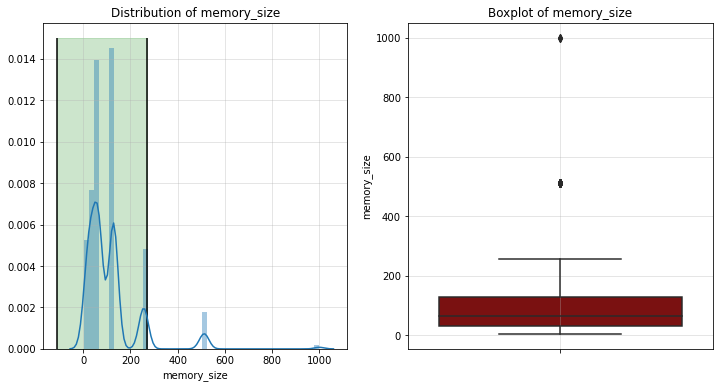

In [32]:
find_outliers(data_nonull, 'memory_size', ymax=0.015)

In [33]:
data_nonull['memory_size'].nunique()

9

<h3>Analysis of 'Memory Size':</h3>
<p><ul>
    <li>From the distribution of 'memory_size', we can see it has discrete values. It is also correct since the memory of our phones is in Giga Bytes and phones are fitted with standard memories i.e. 1GB, 2GB, 4GB, 8GB, 16GB, etc. thus they are discrete. Hence, we can try $Softmax Regression$ which is nothing but multi-class classification algorithm (quite similar to Logistic Regression) and consider the problem of dealing with missing values as CLassification Problem.</li>
</ul></p>

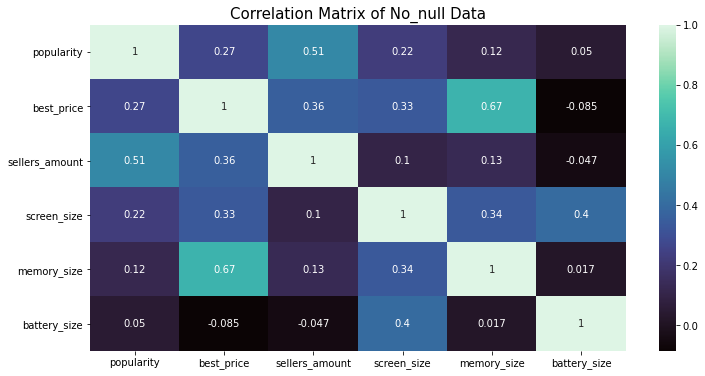

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_nonull.corr(), annot=True, cmap='mako')
plt.title('Correlation Matrix of No_null Data', fontsize=15)
plt.savefig('Correlation Matrix of choosing most correlated features of memory_size')

<h4>Analysis of Correlation Matrix:</h4>
<p><ol>
    <li>Best Price has high correlation with 'memory_size', hence it means it will be good predictor of 'memory_size' and we can also establish a Causal Relationship i.e. Cause of High Memory is Higher Price, since we know memory is pretty expensive and as the memory of the phone increases the price of phone also increases.</li>
    <li>It can be observed that 'screen_size' seems to have a moderate correlation with 'memory_size'. If we try to think about this in depth i.e. how 'screen_size' would affect 'memory_size' and after thinking enough, you might come upto the conclusion that they are not at all directly related. However, from the data it represents 0.34 correlation between them and the only reason which I could think of for why they have this much correlation also is it might be interrealted. Since, we know the phones which have higher memory have higher price. It also may be thought that the phones which have higher screen size also have higher price and since both the features 'screen_size' and 'memory_size' depend upon 'best_price', thus that might be the reason and thus, initially I won't use it a predictor for predicting 'memory_size'.</li>
    <li><strong>There seems 3 features which have large enough correlation with 'memory_size', which are 'best_price', 'popularity', 'screen_size' and 'sellers_price'. Thus we need to inspect the univariate outliers of these features individually and deal with them accordingly.</strong></li>
    </ol></p>

<h4>Outliers and Transformation of 'best_price':</h4>

All the data values should be within Lower Thresh i.e. -7485.125 and Upper Thresh. i.e. 19407.875
Number of Outliers towards the Upper Whisker: 134 with Proportion of outliers = 10.947712418300654 %
Number of Outliers towards the Lower Whisker: 0 with Proportion of outliers = 0.0 %
Median of best_price: 4728.0


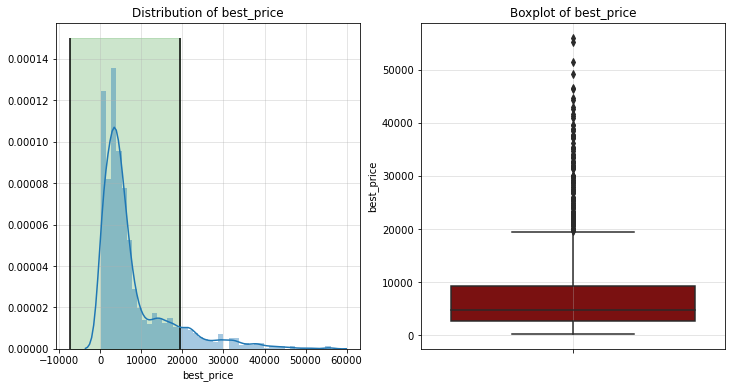

In [35]:
# investigating outliers of 'best_price'
find_outliers(data, 'best_price', ymax=0.00015)

<p>There seems to be 10.94% of total data acting as outlier and since it is heavily right skewed, thus we can take logarithmic transformation which could also help us to reduce the scale of the 'best_price' since it seems to have quite large scale.</p>

Text(0.5, 1.0, 'Logarithmic Transformation of Best_price')

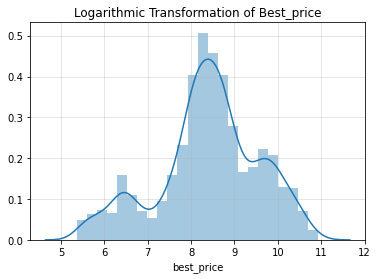

In [36]:
# let us try how the distribution of log of 'best_price' would look
# has outliers towards the upper whisker and since it seems to be highly right skewed distribution, thus we can try 
# logarithmic transformation.
sns.distplot(np.log(data['best_price']))
plt.grid(True, alpha=0.4)
plt.title('Logarithmic Transformation of Best_price')

<p>Since now the distribution seems to be quite good an centered towards the median of around 8 to 9 i.e. log_best_price, hence we can consider this transformation and thus, try to deal with the extreme outliers of 'best_price'.</p>

All the data values should be within Lower Thresh i.e. 5.947566762723842 and Upper Thresh. i.e. 11.055843533240402
Number of Outliers towards the Upper Whisker: 0 with Proportion of outliers = 0.0 %
Number of Outliers towards the Lower Whisker: 40 with Proportion of outliers = 3.2679738562091507 %
Median of log_best_price: 8.461257536718556


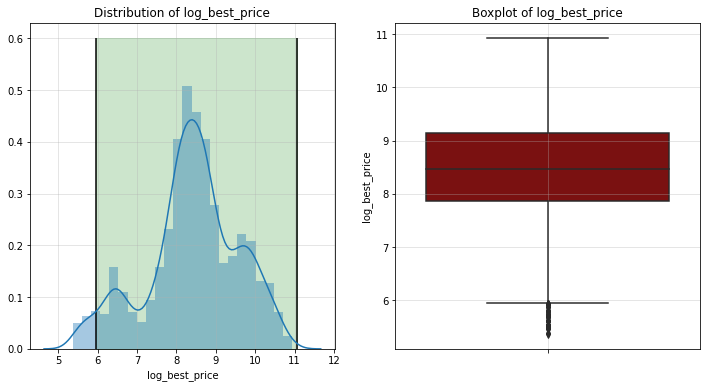

In [37]:
# outliers of 'log_best_price'
data['log_best_price'] = np.log(data['best_price'])
find_outliers(data, 'log_best_price', 0.6)
# try using winsorizing since now the percentage of outliers < 5%.

<p>It seems still there are outliers after transforming it using log transformation, but from the original 'best_price', now the proportion of outliers has reduced to 3% and that to towards the lower quartile. Hence, we can use 'winsorizing' for dealing with outliers since the proportion of outliers are less than 5%.</p>

All the data values should be within Lower Thresh i.e. 5.947566762723842 and Upper Thresh. i.e. 11.055843533240402
Number of Outliers towards the Upper Whisker: 0 with Proportion of outliers = 0.0 %
Number of Outliers towards the Lower Whisker: 40 with Proportion of outliers = 3.2679738562091507 %
Median of log_best_price: 8.461257536718556


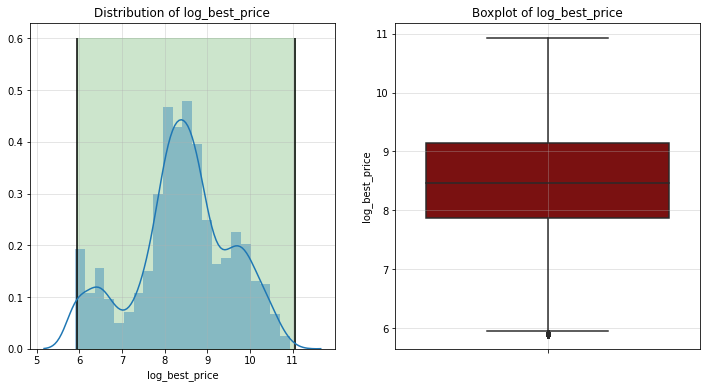

In [38]:
# winsorizing i.e. dealing with the 3% outliers lying towrds the lower quartile.
data['log_best_price'] = np.where(data['log_best_price']<5.947, 5.9, data['log_best_price'])
find_outliers(data, 'log_best_price', ymax=0.6)

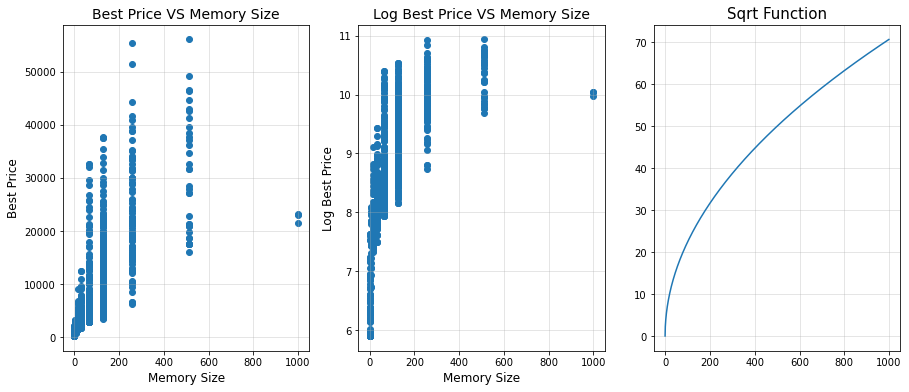

In [39]:
# plotting the scatter plots between 'memory_size' and 'best_price' : ''log_best_price'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
ax1.scatter(data['memory_size'], data['best_price'])
ax2.scatter(data['memory_size'], data['log_best_price'])

# setting the labels of first plot: 
ax1.set_xlabel('Memory Size',fontsize=12)
ax1.set_ylabel('Best Price',fontsize=12)
ax1.set_title('Best Price VS Memory Size', fontsize=14)
ax1.grid(True, alpha=0.4)

# setting the labels of second plot: 
ax2.set_xlabel('Memory Size',fontsize=12)
ax2.set_ylabel('Log Best Price',fontsize=12)
ax2.set_title('Log Best Price VS Memory Size', fontsize=14)
ax2.grid(True, alpha=0.4)

# plotting the graph of sqrt():
rand = np.arange(0, 5000, 5)
ax3.plot(np.sqrt(rand))
ax3.set_title('Sqrt Function', fontsize=15)
ax3.grid(True, alpha=0.4)

<h4>Analysis of Plots:</h4>
<p><ol>
<li>The first plot shows no as such relation between the features and we are not able to gain any insight on data based upon this plot.</li>
    <li>The 2nd Plot gives a better outlook and it also gives a very intuitive point that if you look how the data between these two features is distributed, it resembles quite like square root function, which is plotted in the 3rd plot. Hence, it means since we want to deal with the missing values of 'memory_size', thus taking sqrt('missing_value') might help us creating a better model since the way data is distributed in 2nd plot, it highly indicates to us that there exists sqrt() relationship between 'memory_size' and 'log_best_price'. It could also be verified by: first we would like to train a simple Linear Regression with 'log_best_price' and dependent feature='memory_size', then after inspecting the R-Squared and all, another Regression model will be built where dependent feature will be = sqrt(memory_size) and we would inspect if there is an increase if R-sqauerd or not.</li>
</ol></p>

<h4>Outliers of 'popularity':</h4>

All the data values should be within Lower Thresh i.e. -0.4987745098039216 and Upper Thresh. i.e. 1.4995915032679739
Number of Outliers towards the Upper Whisker: 0 with Proportion of outliers = 0.0 %
Number of Outliers towards the Lower Whisker: 0 with Proportion of outliers = 0.0 %
Median of popularity: 0.5004084967320261


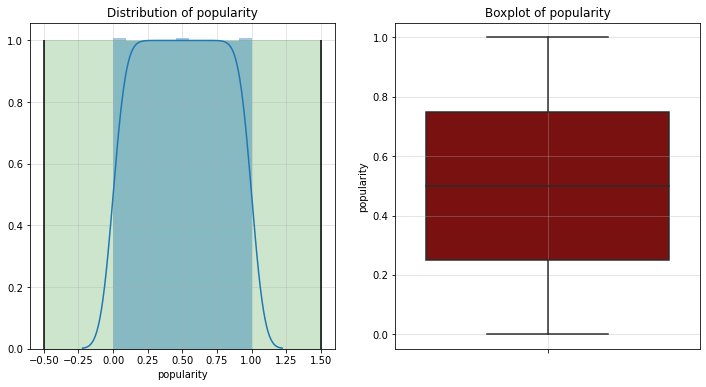

In [40]:
# outliers of 'popularity':
find_outliers(data, 'popularity', ymax=1)
# no outliers are present: uniform distribution:

<p>The distribution of 'popularity' is uniform and has no outliers thus, we need not to transform it in any manner.</p>

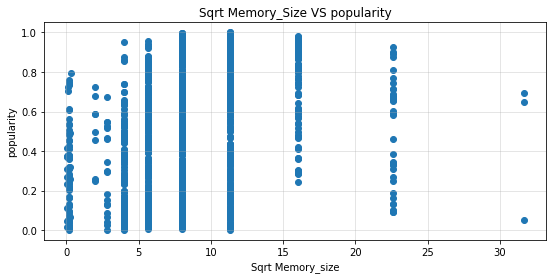

In [41]:
# relationship between sqrt_memory_size and 'popularity':
def scatter(feature):
    plt.figure(figsize=(9, 4))
    plt.scatter(np.sqrt(data['memory_size']), data[feature])
    plt.grid(True, alpha=0.4)
    plt.xlabel('Sqrt Memory_size')
    plt.ylabel(feature)
    plt.title('Sqrt Memory_Size VS '+ feature)
    
scatter('popularity')

<p>There does not seem to be any significant relationship between popularity and memory_size so that we can transform either of them.</p>

<h4>Outliers of 'screen_size':</h4>

All the data values should be within Lower Thresh i.e. 3.3687499999999995 and Upper Thresh. i.e. 8.21875
Number of Outliers towards the Upper Whisker: 0 with Proportion of outliers = 0.0 %
Number of Outliers towards the Lower Whisker: 197 with Proportion of outliers = 16.094771241830067 %
Median of screen_size: 6.0


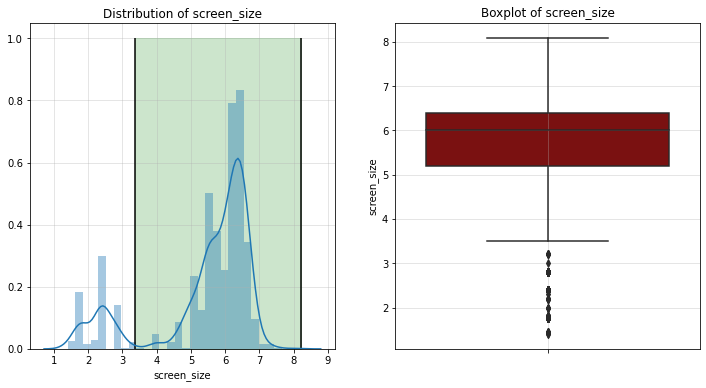

In [42]:
find_outliers(data, 'screen_size', ymax=1)

<p>Screen Size seems to have bi-modal distribution and hence, we cannot certainly use the usual univariate outlier detection techniques, hence, for now, we will leave it as it is and would inspect the multivariate outliers later. </p>

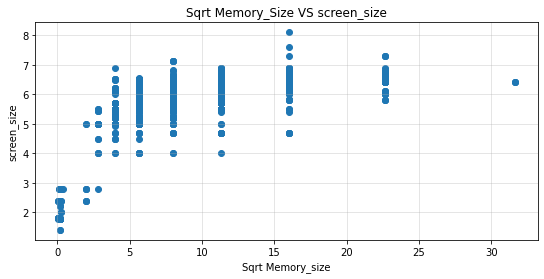

In [43]:
# relationship between sqrt_memory_size and 'screen_Size':
scatter('screen_size')

<p>A linear relationship is not observed but we can observe the relationship between the two of them is similar to as that of sqrt() function and hence, we can try sqrt transformation on 'screen_size'</p>

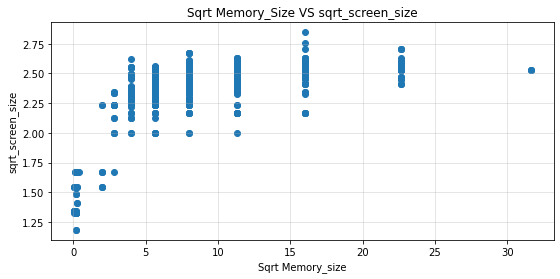

In [44]:
data['sqrt_screen_size'] = np.sqrt(data['screen_size'])
scatter('sqrt_screen_size')

<h4>Outliers of 'sellers_amount':</h4>

All the data values should be within Lower Thresh i.e. -34.0 and Upper Thresh. i.e. 62.0
Number of Outliers towards the Upper Whisker: 49 with Proportion of outliers = 4.003267973856209 %
Number of Outliers towards the Lower Whisker: 0 with Proportion of outliers = 0.0 %
Median of sellers_amount: 8.0


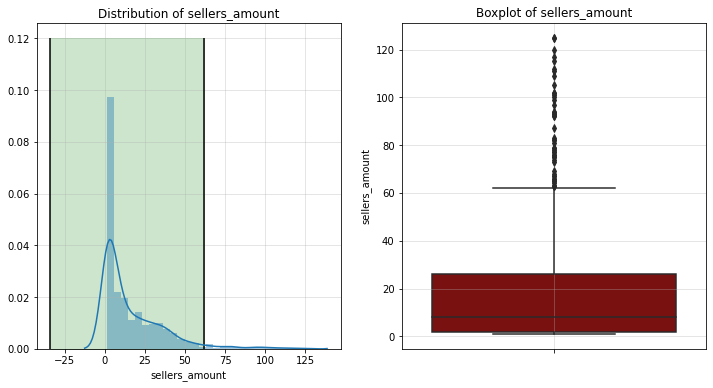

In [45]:
find_outliers(data, 'sellers_amount', ymax=0.12)

<p>It seems that 'sellers_amount' has a right-skewed distribution and 4% of extreme data points towards the upper quartile are considered as outliers. We can use 'winsorizing' to deal with the outliers of 'sellers_amount' but it seems that log_distribution would be even more appropriate for this.</p>

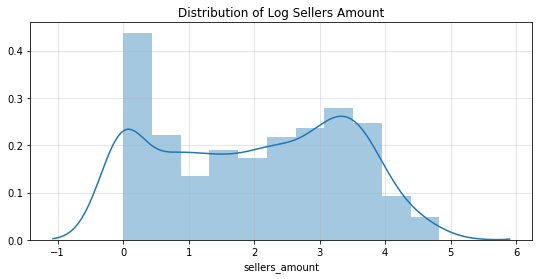

In [46]:
# how log distrbution of sellers_amount would look:
plt.figure(figsize=(9, 4))
sns.distplot(np.log(data['sellers_amount']))
plt.title('Distribution of Log Sellers Amount')
plt.grid(True, alpha=0.4)

<p>Now, the distribution seems to get centered and the distribution looks better than before.</p>

All the data values should be within Lower Thresh i.e. -3.15427685563236 and Upper Thresh. i.e. 7.105520574213788
Number of Outliers towards the Upper Whisker: 0 with Proportion of outliers = 0.0 %
Number of Outliers towards the Lower Whisker: 0 with Proportion of outliers = 0.0 %
Median of log_sellers_amount: 2.0794415416798357


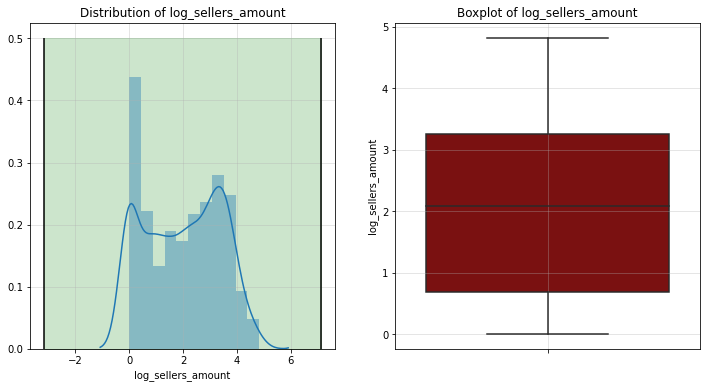

In [47]:
# outliers of log_sellers_amount:
data['log_sellers_amount'] = np.log(data['sellers_amount'])
find_outliers(data, 'log_sellers_amount', ymax=0.5)

<p>Hence, log transformation of 'sellers_amount' seems to have no outliers and the data is now centered quite well.</p>

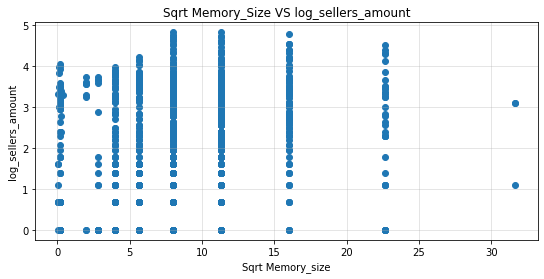

In [48]:
scatter('log_sellers_amount')

<p>There seems to be no significant relationship between the above two features.</p>

<h4>Modelling for predicting the missing values of 'memory_size':</h4>

In [49]:
# transforming 'memory_size' and creating the test and train data in order to deal with the missing values of 'memory_size':
data['sqrt_memory_size'] = np.sqrt(data['memory_size'])
train_data_memory = data[data['memory_size'].notnull()]
test_data_memory = data[data['memory_size'].isnull()]

In [50]:
# Set of indep features which have correlation greater than 0.7 and overlooking this would definitely 
# results in Autocorrelation in errors and Multicollinearity:
def highly_corr_feats(data, threshold=0.7):
    indep_corr = data.corr()
    indep_corr_idx = indep_corr.index
    indep_corr_cols = indep_corr.columns
    corr_feats = {} # to store the pair of features which have correlation higher than 0.7: 
    for row_idx in range(len(indep_corr_idx)):
        for col_idx in range(len(indep_corr_cols)):
            if col_idx != row_idx:
                if indep_corr.iloc[row_idx, col_idx] > threshold:
                    corr_feats[indep_corr_idx[row_idx]] = indep_corr_cols[col_idx]
                    
    return corr_feats

In [51]:
highly_corr_feats(train_data_memory)

{'best_price': 'sqrt_memory_size',
 'sellers_amount': 'log_sellers_amount',
 'screen_size': 'sqrt_screen_size',
 'memory_size': 'sqrt_memory_size',
 'log_best_price': 'sqrt_memory_size',
 'sqrt_screen_size': 'screen_size',
 'log_sellers_amount': 'sellers_amount',
 'sqrt_memory_size': 'log_best_price'}

In [52]:
# target values:
# considering it as multi-class classification problem:
train_data_memory['sqrt_memory_size'].unique()

array([ 2.82842712,  4.        ,  8.        ,  5.65685425, 11.3137085 ,
        0.06324555,  0.12649111,  2.        , 16.        ,  0.17888544,
        0.25298221, 22.627417  , 31.6227766 ,  0.05656854,  0.35777088])

In [53]:
# mapping the target feature values to be 0 to 14:
classes = {}
for idx in range(train_data_memory['sqrt_memory_size'].nunique()):
    classes[idx] = train_data_memory['sqrt_memory_size'].unique()[idx]
    
classes

{0: 2.8284271247461903,
 1: 4.0,
 2: 8.0,
 3: 5.656854249492381,
 4: 11.313708498984761,
 5: 0.06324555320336758,
 6: 0.12649110640673517,
 7: 2.0,
 8: 16.0,
 9: 0.17888543819998318,
 10: 0.25298221281347033,
 11: 22.627416997969522,
 12: 31.622776601683793,
 13: 0.0565685424949238,
 14: 0.35777087639996635}

In [54]:
train_data_memory['target'] = train_data_memory['memory_size'] 
for idx in range(len(list(classes.values()))):
    train_data_memory['target'] = np.where(train_data_memory['sqrt_memory_size']==list(classes.values())[idx], list(classes.keys())[idx], train_data_memory['target'])

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Frequency of Data Points belonging to each Target')

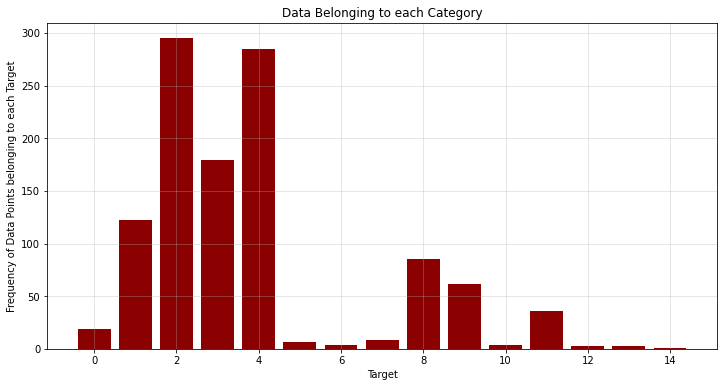

In [55]:
# number of data points for each target class:
frequency = []
for cat in train_data_memory['target'].unique():
    freq =len(train_data_memory[train_data_memory['target']==cat])
    frequency.append(freq)
plt.figure(figsize=(12, 6))
plt.bar(x=train_data_memory['target'].unique(), height=frequency, color='darkred')
plt.grid(True, alpha=0.4)
plt.title('Data Belonging to each Category')
plt.xlabel('Target')
plt.ylabel('Frequency of Data Points belonging to each Target')

In [56]:
train_data_memory.corr()['sqrt_memory_size']

popularity            0.303887
best_price            0.740107
sellers_amount        0.163418
screen_size           0.624997
memory_size           0.927560
battery_size          0.315008
log_best_price        0.829359
sqrt_screen_size      0.610012
log_sellers_amount    0.183152
sqrt_memory_size      1.000000
target                0.421548
Name: sqrt_memory_size, dtype: float64

Text(0.5, 1.0, 'Relationship for Memory Size')

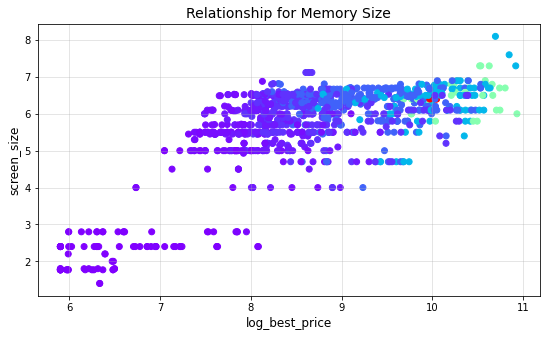

In [57]:
# relationship between Log_best_price and screen_size for 'memory_size':
plt.figure(figsize=(9, 5))
plt.scatter(train_data_memory['log_best_price'], train_data_memory['screen_size'] , c=train_data_memory['memory_size'], cmap='rainbow')
plt.grid(True, alpha=0.4)
plt.xlabel('log_best_price', fontsize=12)
plt.ylabel('screen_size', fontsize=12)
plt.title('Relationship for Memory Size', fontsize=14)

<p>The above scatter plot describes that we certainly do not any linear boundary so as to classify the memory_size based upon the log_best_price and screen_size. Hence, we might need to consider more features to increase the space complexity of data and it can also be observed that most of the memory_size are overlapping with others.</p>

In [58]:
# Since the feature 'sqrt_memory_size' has discrete values, thus it would be better to fill the missing values using 
#'Softmax Regression' :
from sklearn.linear_model import LogisticRegression

In [64]:
#setting the independent and dependent features for multi-class classification:
indep_feats = ['log_best_price', 'screen_size', 'popularity']
dep_feat = 'target'

In [65]:
# Training the Softmax Regression (mutli-class model): 
soft_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
soft_reg.fit(train_data_memory[indep_feats], train_data_memory[dep_feat])

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [66]:
# predicting the sqrt of memory size of test data i.e. data points which have missing values of memory_size:
pred_target = soft_reg.predict(test_data_memory[indep_feats])
pred_target

array([9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 1., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

<h3>Evaluating the Predictions on Test Data for 'Target':</h3>

In [67]:
# checking distributions of each feature:
def distributions(data, color='darkred'):
    plt.figure(figsize=(12, 6))
    for plot_num, feat in enumerate(data.columns):
        plt.subplot(2, 2, plot_num+1)
        plt.grid(True, alpha=0.4)
        sns.distplot(data[feat], color=color)

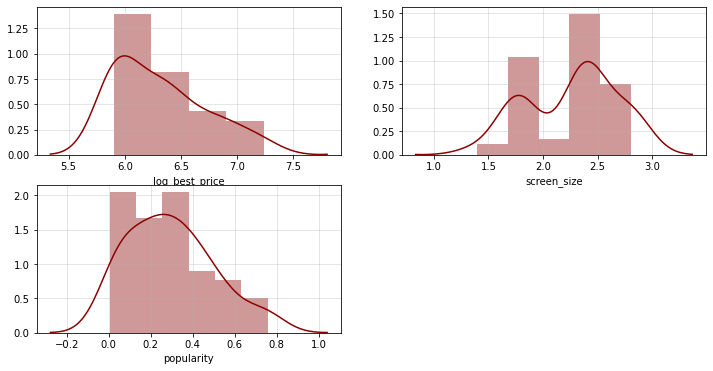

In [68]:
# characteristics of train_data which have target=9:  
target_9 = train_data_memory[train_data_memory['target']==9][indep_feats]
distributions(target_9)
plt.savefig('Distribution of Training Data with Target == 9')

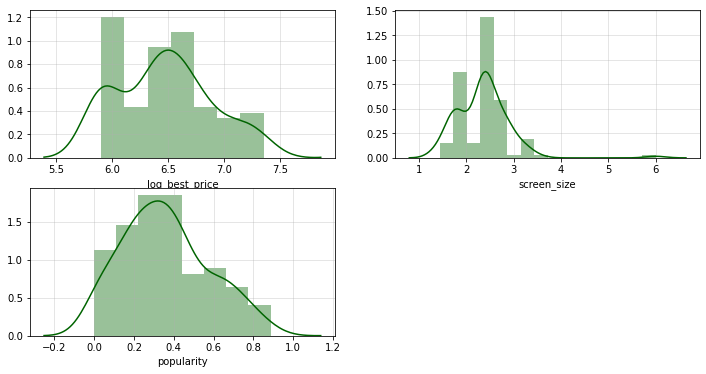

In [69]:
# characteristics of test_data for whom the predictions are to be made:
distributions(test_data_memory[indep_feats], color='darkgreen')
plt.savefig("Distribution of Test Data's Indep Features for predicting memory_size")

<p>We can clearly observe that almost all of the data points have been classified as the element of Target=9. Hence, I have considered the distribution of training data with Target==9 and Test Data for which the Target is predicted to be 9. On looking the above graphs,<strong> the range and their frequency of each independent feature is quite similar to each other </strong> which indicates that we have made quite good predictions and the way we have dealt with the missing values of 'sqrt_memory_size' or 'memory_size' has been quite accurate.</p>

<h3>Concatenating the Training and Test Data of Memory Size:</h3>

In [70]:
# Converting the results of target back to sqrt memory size:
test_data_memory['target'] = pred_target
for idx in range(len(test_data_memory['target'])):
    test_data_memory['sqrt_memory_size'] = np.where(test_data_memory['target']==list(test_data_memory['target'])[idx], classes[list(test_data_memory['target'])[idx]], test_data_memory['sqrt_memory_size'])

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [71]:
# unique values of 'sqrt_memory_size':
test_data_memory['sqrt_memory_size'].unique()

array([0.17888544, 4.        ])

In [72]:
# dealing with the missing values of 'memory_size' and 'sqrt_memory_size':
test_data_memory['memory_size'] = test_data_memory['sqrt_memory_size']**2
test_data_memory.isnull().sum()

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


brand_name            0
os                    0
popularity            0
best_price            0
sellers_amount        0
screen_size           0
memory_size           0
battery_size          0
release_date          0
log_best_price        0
sqrt_screen_size      0
log_sellers_amount    0
sqrt_memory_size      0
target                0
dtype: int64

In [73]:
# dropping the 'target' feature since it was introduced only for the purpose of multiclass classification:
train_data_memory = train_data_memory.drop(['target'], axis=1)
test_data_memory = test_data_memory.drop(['target'], axis=1)

In [74]:
# now concatenating the data:
data = pd.concat([train_data_memory, test_data_memory])
data

,brand_name,os,popularity,best_price,sellers_amount,screen_size,memory_size,battery_size,release_date,log_best_price,sqrt_screen_size,log_sellers_amount,sqrt_memory_size
0,ALCATEL,Android,0.344771,1690.0,36,5.00,8.000,2000.0,10-2020,7.432484,2.236068,3.583519,2.828427
1,ALCATEL,Android,0.263889,1803.0,36,5.00,16.000,2000.0,9-2020,7.497207,2.236068,3.583519,4.000000
2,ALCATEL,Android,0.244281,1803.0,36,5.00,16.000,2000.0,9-2020,7.497207,2.236068,3.583519,4.000000
3,ALCATEL,Android,0.234477,1803.0,36,5.00,16.000,2000.0,9-2020,7.497207,2.236068,3.583519,4.000000
4,Nokia,Android,0.855392,1999.0,10,5.71,16.000,3000.0,4-2020,7.600402,2.389561,2.302585,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,Nomi,Android,0.573529,584.0,35,2.80,0.032,1750.0,1-2020,6.369901,1.673320,3.555348,0.178885
1116,Nomi,Android,0.114379,574.0,32,2.80,0.032,1750.0,1-2020,6.352629,1.673320,3.465736,0.178885
1117,Nomi,Android,0.500817,580.0,34,2.80,0.032,1750.0,1-2020,6.363028,1.673320,3.526361,0.178885
1118,Nomi,Android,0.311275,1071.0,2,2.80,0.032,2500.0,8-2019,6.976348,1.673320,0.693147,0.178885


In [75]:
# missing values of data:
data.isnull().sum()

brand_name            0
os                    0
popularity            0
best_price            0
sellers_amount        0
screen_size           0
memory_size           0
battery_size          0
release_date          0
log_best_price        0
sqrt_screen_size      0
log_sellers_amount    0
sqrt_memory_size      0
dtype: int64

<p>Now, the data has no missing values and we have finally dealt with all the missing values. Thus, we can now investigate each feature and try to look their outliers and then transform them if they do contain some outliers.</p>

<h3>Investigating Outliers in each Numerical Feature:</h3>

<h4>Outliers of 'Battery_size':</h4>

All the data values should be within Lower Thresh i.e. 672.5 and Upper Thresh. i.e. 6612.5
Number of Outliers towards the Upper Whisker: 25 with Proportion of outliers = 2.042483660130719 %
Number of Outliers towards the Lower Whisker: 20 with Proportion of outliers = 1.6339869281045754 %
Median of battery_size: 3687.0


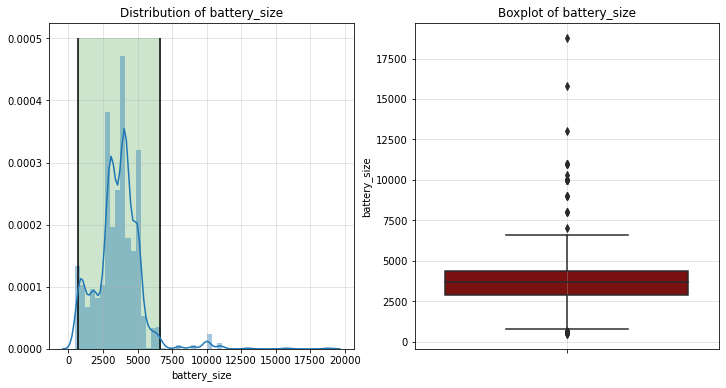

In [76]:
# outliers of 'battery_size':
find_outliers(data, 'battery_size', ymax=0.0005)
# since the proportion of outliers are less than 5%, hence, we can use winsorizing technique. Further, notice outliers are present on both the whiskers.

<p>It has a multimodal distribution and seems to have 2.0% of the extreme data points towards the upper quartile as outliers and also 1.63% of the extreme data points towards the lower quartile are outliers. However, we might choose either 'winsorizing' since the total percentage of outliers are less than 5% or we can choose logarithmic transformation. Since it has multimodal distribution, hence logarithmic transformation will not work that well, thus, we can go ahead with 'winsorizing'.</p>

In [77]:
# winsorizing:
data['battery_size'] = np.where(data['battery_size']<672.5, 672, data['battery_size'])
data['battery_size'] = np.where(data['battery_size']>6612.5, 6612, data['battery_size'])
print('Maximum Value of battery_size = {} and Minimum Value of battery_size = {}'.format(max(data['battery_size']), min(data['battery_size'])))

Maximum Value of battery_size = 6612.0 and Minimum Value of battery_size = 672.0


All the data values should be within Lower Thresh i.e. 672.5 and Upper Thresh. i.e. 6612.5
Number of Outliers towards the Upper Whisker: 0 with Proportion of outliers = 0.0 %
Number of Outliers towards the Lower Whisker: 20 with Proportion of outliers = 1.6339869281045754 %
Median of battery_size: 3687.0


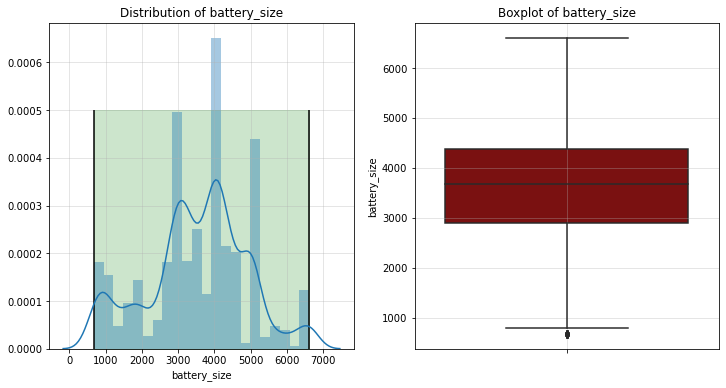

In [78]:
# outliers of battery_size after winsorizing<h4>Outliers of 'screen_size':</h4>:
find_outliers(data, 'battery_size', ymax=0.0005)

<p>Now, the outliers of 'battery_size' have been dealt with.</p>

<h4>Creating a new feature using the 'release_date':</h4>

In [79]:
# let us create a new field using the date column:
lst_date = list(data['release_date'])
lst_diff_year = []
cur_year = 2021 # current_year
for year in lst_date:
    lst_diff_year.append(cur_year-int(year[-4:]))

data['diff_years'] = lst_diff_year
# printing stats of diff_years:
print('Maximum Difference in Years:', max(lst_diff_year))
print('Minimum Difference in Years:', min(lst_diff_year))

Maximum Difference in Years: 8
Minimum Difference in Years: 0


All the data values should be within Lower Thresh i.e. -2.0 and Upper Thresh. i.e. 6.0
Number of Outliers towards the Upper Whisker: 17 with Proportion of outliers = 1.3888888888888888 %
Number of Outliers towards the Lower Whisker: 0 with Proportion of outliers = 0.0 %
Median of diff_years: 2.0


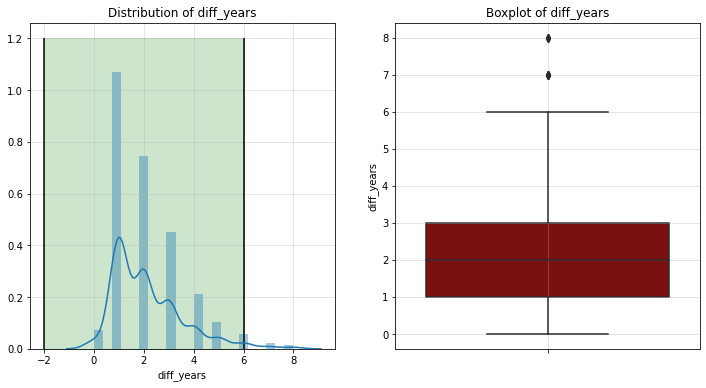

In [80]:
find_outliers(data, 'diff_years', ymax=1.2)

<p>It means, we have most of the phones data belonging to 1 year difference i.e. 2020 and as we move beyond, the number of data considered is also reduced. Remember, 'log_battery_size' and 'sqrt_memory_size' have already been observed at:</p>

<h3>Multivariate Outliers using Mahalanobis Distance:</h3>

In [81]:
# overview of the whole data:
data.head()

,brand_name,os,popularity,best_price,sellers_amount,screen_size,memory_size,battery_size,release_date,log_best_price,sqrt_screen_size,log_sellers_amount,sqrt_memory_size,diff_years
0,ALCATEL,Android,0.344771,1690.0,36,5.00,8.0,2000.0,10-2020,7.432484,2.236068,3.583519,2.828427,1
1,ALCATEL,Android,0.263889,1803.0,36,5.00,16.0,2000.0,9-2020,7.497207,2.236068,3.583519,4.000000,1
2,ALCATEL,Android,0.244281,1803.0,36,5.00,16.0,2000.0,9-2020,7.497207,2.236068,3.583519,4.000000,1
3,ALCATEL,Android,0.234477,1803.0,36,5.00,16.0,2000.0,9-2020,7.497207,2.236068,3.583519,4.000000,1
4,Nokia,Android,0.855392,1999.0,10,5.71,16.0,3000.0,4-2020,7.600402,2.389561,2.302585,4.000000,1


In [82]:
imp_feats = ['brand_name', 'os', 'diff_years', 'popularity', 'log_best_price', 'log_sellers_amount', 'screen_size',
                   'sqrt_memory_size', 'battery_size'] 
num_feats = ['popularity', 'log_best_price', 'log_sellers_amount', 'screen_size', 'sqrt_memory_size', 'battery_size', 'diff_years']

In [83]:
# only numerical features:
num_data = data[num_feats]
ind_data = num_data.drop(['log_best_price'], axis=1)
ind_data.head()

,popularity,log_sellers_amount,screen_size,sqrt_memory_size,battery_size,diff_years
0,0.344771,3.583519,5.00,2.828427,2000.0,1
1,0.263889,3.583519,5.00,4.000000,2000.0,1
2,0.244281,3.583519,5.00,4.000000,2000.0,1
3,0.234477,3.583519,5.00,4.000000,2000.0,1
4,0.855392,2.302585,5.71,4.000000,3000.0,1


In [84]:
# Scaling the Data:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ind_data)
scaled_ind_data = pd.DataFrame(scaled_data, columns=ind_data.columns)
scaled_ind_data.head()

,popularity,log_sellers_amount,screen_size,sqrt_memory_size,battery_size,diff_years
0,0.344235,0.742189,0.537313,0.087811,0.223569,0.125
1,0.263287,0.742189,0.537313,0.124926,0.223569,0.125
2,0.243663,0.742189,0.537313,0.124926,0.223569,0.125
3,0.233851,0.742189,0.537313,0.124926,0.223569,0.125
4,0.855274,0.476892,0.643284,0.124926,0.391919,0.125


In [85]:
def mahalanobis_distance(data):
    
    # computing the mean of each feature and aligning the features in the right way:
    x = np.transpose(data.values) # to get all the feature's value in each vector.
    mean = np.mean(x, axis=1) # compute mean of each of the feature.
    means = np.array(mean).reshape((6, 1)) # reshaping the mean matrix
    
    # computing the terms required:
    x_minus_mu = x-means
    inv_cov_mat = np.linalg.inv(np.cov(x))
    left_side = np.dot(np.transpose(x_minus_mu), inv_cov_mat)
    maha_dist_matrix = np.dot(left_side, x_minus_mu)
    return maha_dist_matrix.diagonal()

In [86]:
# calling the function of 'Mahalanobis_distance' to compute the mahalanobis distance based upon the 5 predictors:
maha_dist = mahalanobis_distance(scaled_ind_data)

In [87]:
indep_num_data = scaled_ind_data.copy()
indep_num_data['maha_dist'] = maha_dist
indep_num_data

,popularity,log_sellers_amount,screen_size,sqrt_memory_size,battery_size,diff_years,maha_dist
0,0.344235,0.742189,0.537313,0.087811,0.223569,0.125,8.311000
1,0.263287,0.742189,0.537313,0.124926,0.223569,0.125,8.630885
2,0.243663,0.742189,0.537313,0.124926,0.223569,0.125,8.943695
3,0.233851,0.742189,0.537313,0.124926,0.223569,0.125,9.105913
4,0.855274,0.476892,0.643284,0.124926,0.391919,0.125,5.673818
...,...,...,...,...,...,...,...
1219,0.573181,0.736354,0.208955,0.003875,0.181481,0.125,5.404475
1220,0.113655,0.717794,0.208955,0.003875,0.181481,0.125,7.824683
1221,0.500409,0.730350,0.208955,0.003875,0.181481,0.125,5.231660
1222,0.310711,0.143559,0.208955,0.003875,0.307744,0.250,6.238994


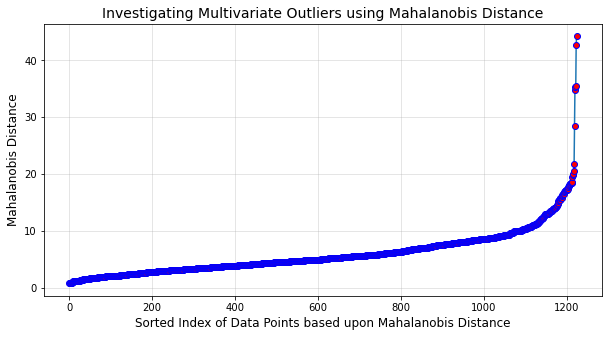

In [88]:
# plotting the data points with sorted values of Mahalanobis Distance :
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, len(indep_num_data)), sorted(indep_num_data['maha_dist']), '-o', mfc='red', mec='blue')
plt.xlabel('Sorted Index of Data Points based upon Mahalanobis Distance', fontsize=12)
plt.ylabel('Mahalanobis Distance', fontsize=12)
plt.title('Investigating Multivariate Outliers using Mahalanobis Distance', fontsize=14)
plt.grid(True, alpha=0.4)
plt.savefig('Mahalanobis Distance Plot of sorted data based upon the distance')

<p>From the above figure, we can see that there are some points which have mahalanobis distance greater than 20. These are all the outliers for our data and hence, we can further compute p-values for them based upon the chi-square distribution of mahalanobis with degrees of freedom = 5, since 5 features were used to investigate the multivariate outliers. Overall from the graph, we can say that around 1150 points have mahalanobis distance less than 10.</p>

In [89]:
from scipy.stats import chi2 

In [90]:
# p_value in this context represents the area towards the tail of Chi-Square distribution and if the p_value is less than 0.01
# which means it lies towards the extreme portion of Tail of distribution, thus it will be considered as an Outlier:
indep_num_data['p_values'] = 1-(chi2.cdf(indep_num_data['maha_dist'], 5))
indep_num_data['Outlier'] = np.where(indep_num_data['p_values']<0.01, 1, 0)
# 1-> Corresponds to the outlier.
# 0-> Corresponds to the inlier.

In [91]:
# investigating how many of the points are outliers:
outliers_df = indep_num_data[indep_num_data['Outlier']==1]
len(outliers_df)

45

<p>Thus, in our data, 26 points (quite less points) have been considered as outliers and thus we can further remove those points from the data only after Visualizing it. Hence, I will try to reduce the dimensions of data using PCA and then visualize it.</p>

In [92]:
# PCA Analysis:
from sklearn.decomposition import PCA

In [93]:
def decompose(data, n_comps):
    pca = PCA(n_components=n_comps)
    dim_red_data = pca.fit_transform(data)
    print('Explained Variance Ratio by each principal component is as follows:')
    print(pca.explained_variance_ratio_)
    return dim_red_data

In [94]:
# scaled indep data:
scaled_ind_data.head()

,popularity,log_sellers_amount,screen_size,sqrt_memory_size,battery_size,diff_years
0,0.344235,0.742189,0.537313,0.087811,0.223569,0.125
1,0.263287,0.742189,0.537313,0.124926,0.223569,0.125
2,0.243663,0.742189,0.537313,0.124926,0.223569,0.125
3,0.233851,0.742189,0.537313,0.124926,0.223569,0.125
4,0.855274,0.476892,0.643284,0.124926,0.391919,0.125


In [95]:
# reducing the dimension of Data:
# PCA works well for scaled data, thus make sure data is scaled:
dim_red_data = decompose(scaled_ind_data, 2)
dim_red_data

Explained Variance Ratio by each principal component is as follows:
[0.45314319 0.29282554]


array([[ 0.04238951,  0.37954613],
       [ 0.08594666,  0.3570101 ],
       [ 0.09860177,  0.35400362],
       ...,
       [ 0.08757846,  0.61573952],
       [ 0.49314964,  0.16771877],
       [-0.20748402,  0.70131525]])

<p>It seems most of the variance has been retained by our very first principal component i.e. it represents or explains 45% variance of the original data and the 2nd principal component explains rest 30% of variance. This means PCA has to a larger extent given us the principal components which are uncorrelated and retains maximum variance of the original data. Further, we can move ahead with Plotting the data so as to inspect the Outliers.</p>

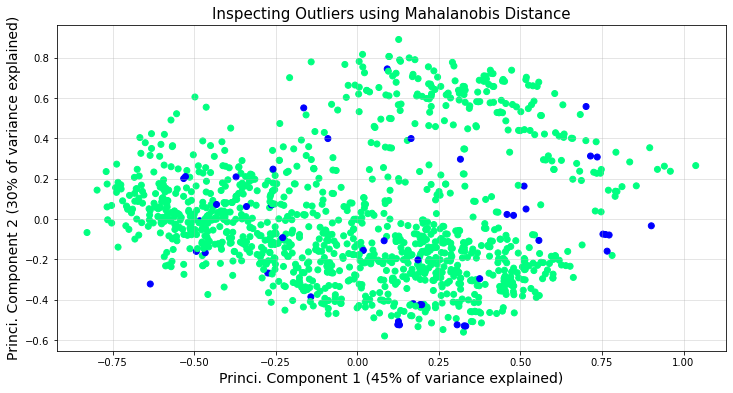

In [96]:
# plot representing Outliers in the data:
plt.figure(figsize=(12, 6))
plt.scatter(dim_red_data[:, 0], dim_red_data[:, 1], c=indep_num_data['Outlier'], cmap='winter_r')
plt.xlabel('Princi. Component 1 (45% of variance explained)', fontsize=14)
plt.ylabel('Princi. Component 2 (30% of variance explained)', fontsize=14)
plt.title('Inspecting Outliers using Mahalanobis Distance', fontsize=15)
plt.grid(True, alpha=0.4)
plt.savefig('Mahalanobis Outliers Plotted PCA')

<p>We cannot inspect any pattern of how 'mahalanobis distance' was able to figure out the Multivariate Outliers. In the above plot, 'red' points denotes 'outliers' and 'purple' denotes inliers. Thus, if we look closely, the outliers are being detected at any random point and we cannot observe any pattern in the data.</p>

<h3>Multivariate Outliers using Local Outlier Factor Algorithm:</h3>
<p>It is an unsupervised Anomaly Detection algorithm which finds the Outliers based upon the density of its neighbours i.e. it computes the distance to its nearest k- neighbours and selects the k-distance with respect to that point then its reachabiity distance with respect to other data points and in this manner, the algorithm finds the local outliers.</p>

In [97]:
from sklearn.neighbors import LocalOutlierFactor

In [98]:
# data with which we will be working:
scaled_ind_data.head()

,popularity,log_sellers_amount,screen_size,sqrt_memory_size,battery_size,diff_years
0,0.344235,0.742189,0.537313,0.087811,0.223569,0.125
1,0.263287,0.742189,0.537313,0.124926,0.223569,0.125
2,0.243663,0.742189,0.537313,0.124926,0.223569,0.125
3,0.233851,0.742189,0.537313,0.124926,0.223569,0.125
4,0.855274,0.476892,0.643284,0.124926,0.391919,0.125


In [99]:
clf = LocalOutlierFactor(n_neighbors=20)
outliers = clf.fit_predict(scaled_ind_data)
indep_num_data['lof_outlier'] =outliers 

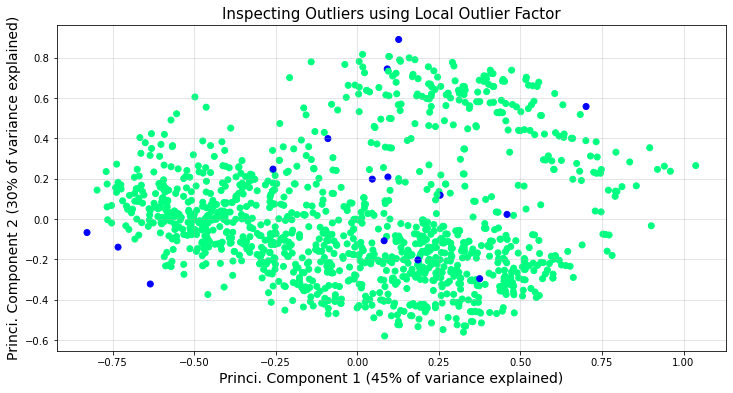

In [100]:
# plot representing Outliers of Local Outlier Factor in the data:
plt.figure(figsize=(12, 6))
plt.scatter(dim_red_data[:, 0], dim_red_data[:, 1], c=indep_num_data['lof_outlier'], cmap='winter')
plt.xlabel('Princi. Component 1 (45% of variance explained)', fontsize=14)
plt.ylabel('Princi. Component 2 (30% of variance explained)', fontsize=14)
plt.title('Inspecting Outliers using Local Outlier Factor', fontsize=15)
plt.grid(True, alpha=0.4)
plt.savefig('Local Outlier Factor Outliers PCA')

In [101]:
# outliers in data based upon the local_outlier_factor: 
len(indep_num_data[indep_num_data['lof_outlier']==-1])

15

<h3>Multivariate Outlier Detection using Isolation Forest:</h3>
<p><ul>
<li>Isolation forest has been constructed using 2 different words where the second word, 'Forest' corresponds to the Random Forest i.e. the ensemble or group of Trees where in Trees we had the objective to split the data based upon the feature which has high information gain and produces homogenous data points i.e. all the data points should correspond to a particular class of target feature.</li>
    <li>The first word 'Isolation' describes the aim of this algorithm where now also the ensemble of trees will be trained but with the aim to isolate each and every data point. This is done based upon the distance metrics or density metrics. </li>
    <li>Remember, over here the features are randomly chosen and the thresholds of features are chosen randomly between the maximum and the minimum value of that feature on which the data is splitted.</li>
    <li> Generally, the data points which are isolated quite early or the points which are isolated within very less splits, they correspond to anomalies or outliers for the data.</li>
</ul></p>

In [102]:
from sklearn.ensemble import IsolationForest

In [103]:
iso_for_clf = IsolationForest(n_estimators=100,
                              contamination = 0.02,
                              bootstrap=True)
outliers_iso_for = iso_for_clf.fit_predict(scaled_ind_data)
indep_num_data['iso_for_outliers'] = outliers_iso_for

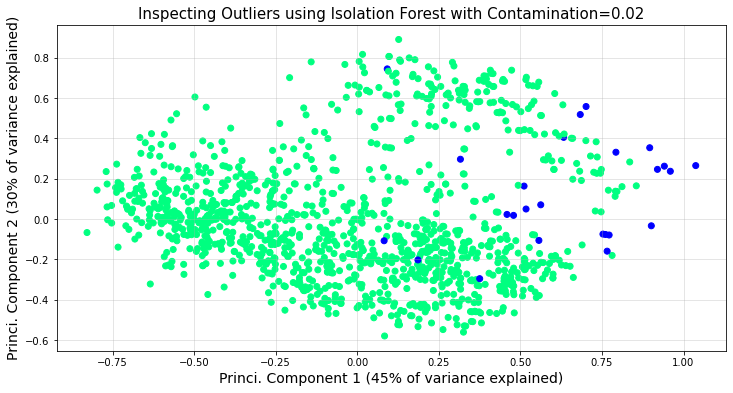

In [104]:
# plot representing Outliers of Isolation Forest in the data:
plt.figure(figsize=(12, 6))
plt.scatter(dim_red_data[:, 0], dim_red_data[:, 1], c=outliers_iso_for, cmap='winter')
plt.xlabel('Princi. Component 1 (45% of variance explained)', fontsize=14)
plt.ylabel('Princi. Component 2 (30% of variance explained)', fontsize=14)
plt.title('Inspecting Outliers using Isolation Forest with Contamination=0.02', fontsize=15)
plt.grid(True, alpha=0.4)
plt.savefig('Isolation Forest Outliers for PCA')

In [105]:
len(indep_num_data[indep_num_data['iso_for_outliers']==-1])

25

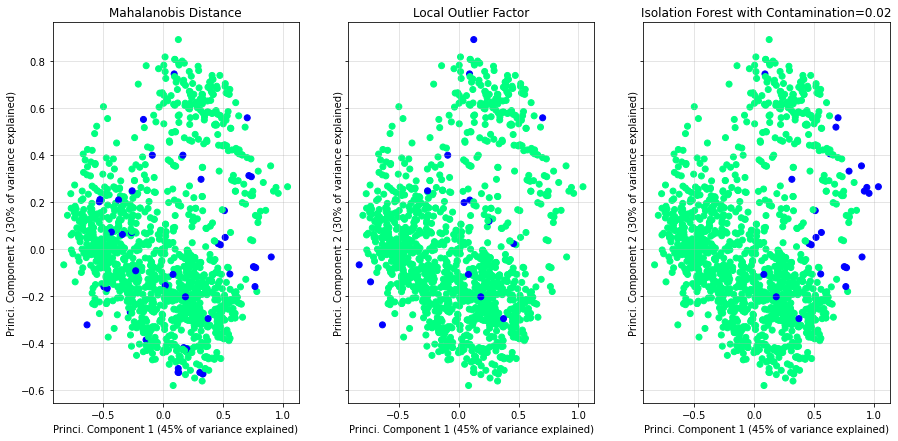

In [106]:
# Comparing the results of all the outliers detection techniques:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7), sharey=True)

# outliers detected using mahalanobis distance:
ax1.scatter(dim_red_data[:, 0], dim_red_data[:, 1], c=indep_num_data['Outlier'], cmap='winter_r')
ax1.set_xlabel('Princi. Component 1 (45% of variance explained)', fontsize=10)
ax1.set_ylabel('Princi. Component 2 (30% of variance explained)', fontsize=10)
ax1.set_title('Mahalanobis Distance', fontsize=12)
ax1.grid(True, alpha=0.4)

# 
ax2.scatter(dim_red_data[:, 0], dim_red_data[:, 1], c=indep_num_data['lof_outlier'], cmap='winter')
ax2.set_xlabel('Princi. Component 1 (45% of variance explained)', fontsize=10)
ax2.set_ylabel('Princi. Component 2 (30% of variance explained)', fontsize=10)
ax2.set_title('Local Outlier Factor', fontsize=12)
ax2.grid(True, alpha=0.4)

#
ax3.scatter(dim_red_data[:, 0], dim_red_data[:, 1], c=outliers_iso_for, cmap='winter')
ax3.set_xlabel('Princi. Component 1 (45% of variance explained)', fontsize=10)
ax3.set_ylabel('Princi. Component 2 (30% of variance explained)', fontsize=10)
ax3.set_title('Isolation Forest with Contamination=0.02', fontsize=12)
ax3.grid(True, alpha=0.4)
plt.savefig('All 3 Multivariate Outliers Techniques')

<h3>Analysis of All the Outlier Detection Algorithms:</h3>
<p><ol>
<li>It seems the Outliers detected using Mahanlanobis Distance almost overlaps with the Outliers detected using Local Outlier Factor ALgorithm.</li>
    <li>The outliers detected using Isolation Forest are pretty different from both the above ones. Hence, I would consider the Outliers of Mahalanobis Distance and Local Outlier Factor and hence, finalize the set of data and explore the relationships between the dependent and independent features. </li>
    </ol></p>

In [107]:
# Considering the indexes for outliers of each outlier technique: 
maha_idx = set(indep_num_data[indep_num_data['Outlier']==1].index)
lof_idx = set(indep_num_data[indep_num_data['lof_outlier']==-1].index)
iso_for_idx = set(indep_num_data[indep_num_data['iso_for_outliers']==-1].index)

In [108]:
idx_to_remove = list(iso_for_idx.union(maha_idx.union(lof_idx)))
len(idx_to_remove)

60

<p>It seems that using the above 3 techniques for finding multivariate outliers in our data produces in total of 51 data points as the multivariate outliers and <strong>we would simply remove them since they account for 0.05% of the total data.</strong></p>

In [109]:
61/1224

0.049836601307189546

In [110]:
# creating the complete data by removing the outliers:
cmp_data = data[imp_feats]
cmp_data = cmp_data.drop(index=idx_to_remove, axis='index')
cmp_data.index = np.arange(0, len(cmp_data))
cmp_data

,brand_name,os,diff_years,popularity,log_best_price,log_sellers_amount,screen_size,sqrt_memory_size,battery_size
0,ALCATEL,Android,1,0.344771,7.432484,3.583519,5.00,2.828427,2000.0
1,ALCATEL,Android,1,0.263889,7.497207,3.583519,5.00,4.000000,2000.0
2,ALCATEL,Android,1,0.244281,7.497207,3.583519,5.00,4.000000,2000.0
3,ALCATEL,Android,1,0.234477,7.497207,3.583519,5.00,4.000000,2000.0
4,Nokia,Android,1,0.855392,7.600402,2.302585,5.71,4.000000,3000.0
...,...,...,...,...,...,...,...,...,...
1159,Nomi,Android,1,0.573529,6.369901,3.555348,2.80,0.178885,1750.0
1160,Nomi,Android,1,0.114379,6.352629,3.465736,2.80,0.178885,1750.0
1161,Nomi,Android,1,0.500817,6.363028,3.526361,2.80,0.178885,1750.0
1162,Nomi,Android,2,0.311275,6.976348,0.693147,2.80,0.178885,2500.0


In [111]:
# sub-dividing the data into numerical, categorical and target feature:
# creating the numerical features data:
num_cmp_data = cmp_data[num_feats]

# creating the categorical features data:
cat_cmp_data = cmp_data[['brand_name', 'os']]

In [112]:
# scaling the numerical Independent features:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(num_cmp_data)
cmp_scaled_data = pd.DataFrame(scaled_data, columns=num_cmp_data.columns)

# creating the target feature:
target_data = cmp_scaled_data['log_best_price']

# Creating the Independent Scaled Data:
num_cmp_data = cmp_scaled_data.drop(['log_best_price'], axis=1)

<h3>Feature Engineering:</h3>
<p>Now, since I have removed the possible outliers, we can proceed with: 
<ol>
    <li><strong>Find or Inspect Relationship between the dependent feature and independent features:</strong>Use ScatterPlots to find the patterns in data i.e. find the relationship between the indep. features and the target feature.</li>
    <li><strong>Transformation:</strong> If any patterns are detected, then we can transform the features based upon it, since then it increases the explanatory power of the dependent feature in the same way as we did while dealing with the missing values of 'memory_size'.</li>
    <li><strong>Encoding the categorical features:</strong> Since, we have 2 categorical features i.e. 'brand_name' and 'os' where 'os' has only 5 categories and thus can easily be encoded using One Hot Encoding where as 'brand_name' contains a lot of categories, thus I would consider the top 5 categories based upon their data points corresponding to that category, i.e. I can use Ordinal Encoding based upon the data points belonging to a particular category or simply use One-Hot Encoding after selecting the topmost 5 categories.</li>
    <li></li>
</ol></p>

Text(0.5, 1.0, 'Correlation of Transformed Features')

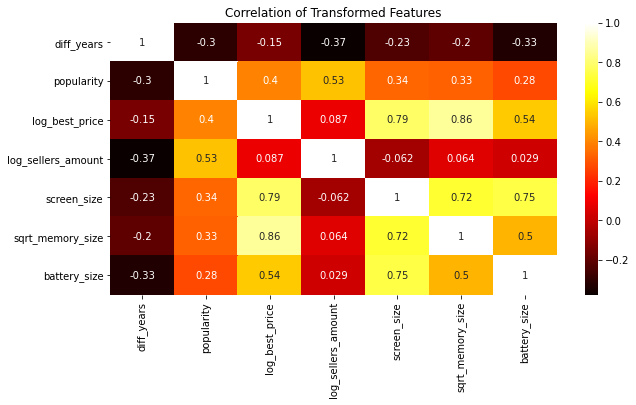

In [113]:
# Plotting the Correlation Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(cmp_data.corr(), annot=True, cmap='hot')
plt.title('Correlation of Transformed Features')

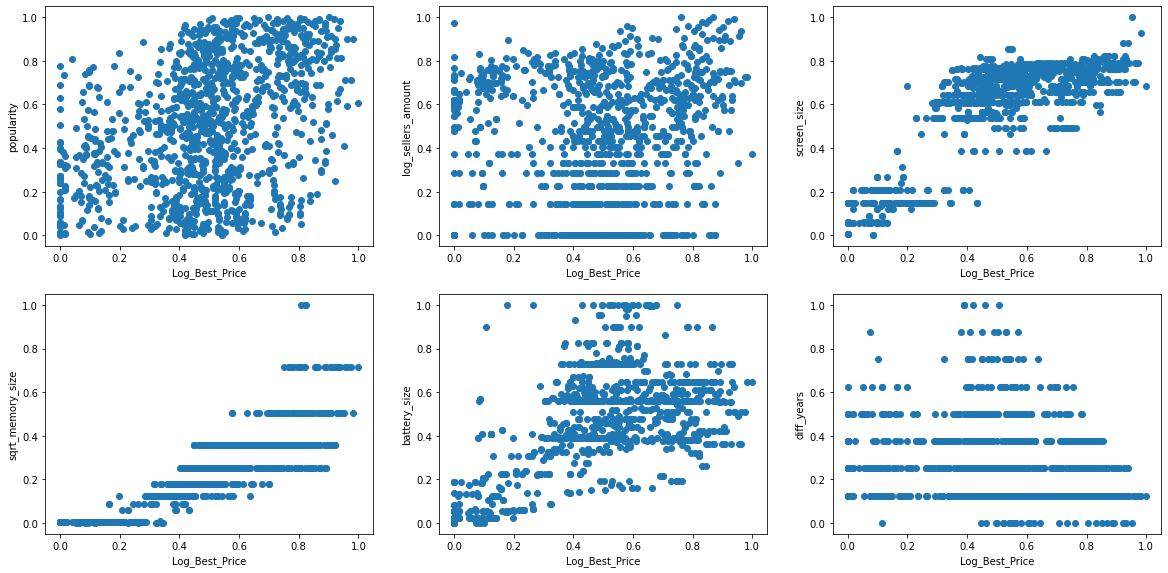

In [114]:
plt.figure(figsize=(20, 15))
for graph_ind, indep_feat in enumerate(num_cmp_data.columns):
    plt.subplot(3, 3, graph_ind+1)
    plt.scatter(target_data, num_cmp_data[indep_feat])
    plt.xlabel('Log_Best_Price')
    plt.ylabel(indep_feat)

<h4>Analysis of ScatterPlots:</h4>
<p><ol>
    <li>Popularity, Log_sellers_amount and sqrt_memory_size do not represents any pattern so that we can further transform their data.</li>
    <li>Though, 'battery_size' and 'screen_size' are the ones with which we can try quadratic transformataion to see if the correlation wrt log_best_price increases.</li>
    </ol></p>

In [115]:
ind_df = cmp_data.copy()
ind_df['sqr_screen_size'] = ind_df['screen_size']**2
ind_df['sqr_battery_size'] = ind_df['battery_size']**2
ind_df.corr()['log_best_price']

diff_years           -0.146656
popularity            0.395165
log_best_price        1.000000
log_sellers_amount    0.087495
screen_size           0.790084
sqrt_memory_size      0.860291
battery_size          0.541610
sqr_screen_size       0.783975
sqr_battery_size      0.418508
Name: log_best_price, dtype: float64

<p>Now, since the correlation has not increased by performing such transformations on screen_size and battery_size, thus the original features will be kept as it is and hence, we can conslude that no further feature engineering is required, since our numerical features cannot be further transformed.</p>

<h3>Feature Selection:</h3>

<h4>Selecting Categorical Features using ANOVA and Numerical Features using Correlation:</h4>

In [116]:
# anova for 'brand_name':
anova_analysis(cmp_data, 'brand_name', num_feats)

ANOVA TABLE for brand_name


,F-Statistic,P-Value
popularity,6.009965,4.258646e-38
log_best_price,44.765273,7.706156e-256
log_sellers_amount,8.538480,4.940039e-59
screen_size,42.650162,8.568163e-248
sqrt_memory_size,19.105934,9.918026e-134
battery_size,24.972016,1.784021e-167
diff_years,4.972788,2.673685e-29


In [117]:
# anova for 'os':
anova_analysis(cmp_data, 'os', num_feats)

ANOVA TABLE for os


,F-Statistic,P-Value
popularity,12.793885,3.977796e-12
log_best_price,34.119690,1.363136e-32
log_sellers_amount,17.354356,1.354941e-16
screen_size,1.557544,1.692752e-01
sqrt_memory_size,15.694287,5.684775e-15
battery_size,7.584093,5.069849e-07
diff_years,23.272527,2.490508e-22


<h4>Analysis of ANOVA:</h4>
<p><ol>
<li>ANOVA Results show us that both the categorical features i.e. 'brand_name' and 'os' are significantly explaining the variance of 'log_best_price' since the average of log_best_price for each category of both the features are different, which means that these 2 features might be significant predictors of 'log_best_price'.</li>
    <li>From, the correlation matrix, we can observe, 'battery_size', 'sqrrt_memory_size', 'screen_size' and 'popularity' seems to have quite high correlation among all the numerical features with respect to the dependent features.</li>
    <li>Hence, I would like to first encode the categorical features data and then try for further feature selection techniques.</li>
</ol></p>

<h3>Encoding Categorical Features:</h3>

In [118]:
#finding the brand_names which have the highest data of that particular brand:
num_data_cat = {}
for pnt, category in enumerate(cat_cmp_data['brand_name'].unique()):
    num_points = len(cat_cmp_data[cat_cmp_data['brand_name']==category])
    num_data_cat[pnt] = (category, num_points)

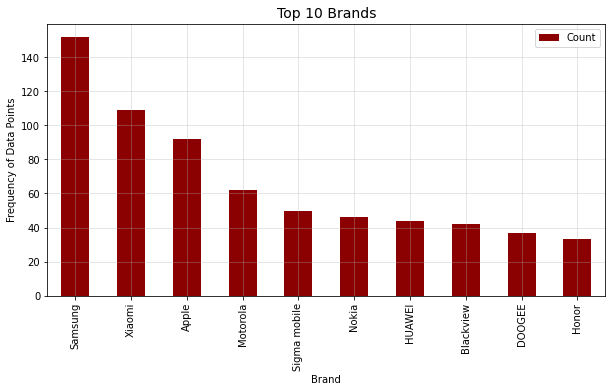

In [119]:
# plotting the categories of Brand which correspod to highest number of data points:
df_num_cat = np.transpose(pd.DataFrame(num_data_cat))
df_num_cat.columns = ['Brand', 'Count']
data_to_plot = df_num_cat.sort_values(by='Count', ascending=False).head(10)
data_to_plot.index = data_to_plot['Brand']
data_to_plot.plot(kind='bar', figsize=(10, 5), color='darkred')
plt.grid(True, alpha=0.4)
plt.title('Top 10 Brands', fontsize=14)
plt.ylabel('Frequency of Data Points')
plt.savefig('Top 10 categories of brand_name whose one hot vector is to be created')

In [120]:
# creating dummy variables of features:
imp_cat_brand = list(data_to_plot.index) # contains the most important brand_names for which dummy variables will be created:
def dummy_var(data, cat_feat, categories=None):
    if categories == None:
        categories = list(data[cat_feat].unique())
        
    for category in categories:
        data[cat_feat+'_'+category] = np.where(data[cat_feat]==category, 1, 0)

    print('Features of Data: ', data.columns)
    print('Shape of Data : ',data.shape)

In [121]:
# creating dummy variables for 'brand_name' for the top 10 most frequenct categories:
dummy_var(cat_cmp_data, 'brand_name', imp_cat_brand)

Features of Data:  Index(['brand_name', 'os', 'brand_name_Samsung', 'brand_name_Xiaomi',
       'brand_name_Apple', 'brand_name_Motorola', 'brand_name_Sigma mobile',
       'brand_name_Nokia', 'brand_name_HUAWEI', 'brand_name_Blackview',
       'brand_name_DOOGEE', 'brand_name_Honor'],
      dtype='object')
Shape of Data :  (1164, 12)


c:\python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
# creating dummy variables for 'os':
dummy_var(cat_cmp_data, 'os')

Features of Data:  Index(['brand_name', 'os', 'brand_name_Samsung', 'brand_name_Xiaomi',
       'brand_name_Apple', 'brand_name_Motorola', 'brand_name_Sigma mobile',
       'brand_name_Nokia', 'brand_name_HUAWEI', 'brand_name_Blackview',
       'brand_name_DOOGEE', 'brand_name_Honor', 'os_Android', 'os_iOS',
       'os_OxygenOS', 'os_WindowsPhone', 'os_EMUI', 'os_KAIOS'],
      dtype='object')
Shape of Data :  (1164, 18)


In [123]:
# dropping the original names:
cat_cmp_data = cat_cmp_data.drop(['brand_name', 'os'], axis=1)

In [124]:
# contains the encoded data for both the categorical features:
cat_cmp_data.columns

Index(['brand_name_Samsung', 'brand_name_Xiaomi', 'brand_name_Apple',
       'brand_name_Motorola', 'brand_name_Sigma mobile', 'brand_name_Nokia',
       'brand_name_HUAWEI', 'brand_name_Blackview', 'brand_name_DOOGEE',
       'brand_name_Honor', 'os_Android', 'os_iOS', 'os_OxygenOS',
       'os_WindowsPhone', 'os_EMUI', 'os_KAIOS'],
      dtype='object')

In [125]:
# complete scaled independent features:
cmp_ind_data = pd.concat([num_cmp_data, cat_cmp_data], axis=1)
cmp_ind_data.columns

Index(['popularity', 'log_sellers_amount', 'screen_size', 'sqrt_memory_size',
       'battery_size', 'diff_years', 'brand_name_Samsung', 'brand_name_Xiaomi',
       'brand_name_Apple', 'brand_name_Motorola', 'brand_name_Sigma mobile',
       'brand_name_Nokia', 'brand_name_HUAWEI', 'brand_name_Blackview',
       'brand_name_DOOGEE', 'brand_name_Honor', 'os_Android', 'os_iOS',
       'os_OxygenOS', 'os_WindowsPhone', 'os_EMUI', 'os_KAIOS'],
      dtype='object')

<p>Now, we would like to perform further Feature Selection Techniques on this complete independent data which comprises of scaled numerical data and encoded categorical data. The advantage of performing Encoding is  it will also give p-values for the encoded categorical features.</p>

In [126]:
# complete independent data:
cmp_ind_data.head()

,popularity,log_sellers_amount,screen_size,sqrt_memory_size,battery_size,diff_years,brand_name_Samsung,brand_name_Xiaomi,brand_name_Apple,brand_name_Motorola,...,brand_name_HUAWEI,brand_name_Blackview,brand_name_DOOGEE,brand_name_Honor,os_Android,os_iOS,os_OxygenOS,os_WindowsPhone,os_EMUI,os_KAIOS
0,0.344235,0.742189,0.537313,0.087811,0.223569,0.125,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.263287,0.742189,0.537313,0.124926,0.223569,0.125,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.243663,0.742189,0.537313,0.124926,0.223569,0.125,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.233851,0.742189,0.537313,0.124926,0.223569,0.125,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.855274,0.476892,0.643284,0.124926,0.391919,0.125,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<h4>f_regression feature selection method:</h4>
<p>This is a univariate feature selection method for selecting the best predictors. Here, the correlation of the indep feature is computed with respect to dependent feature and then the correlation value is converted to f-value and p-value.</p>

In [127]:
from sklearn.feature_selection import f_regression

In [128]:
f_score, p_value = f_regression(X=cmp_ind_data, y=target_data)
f_reg_res = np.transpose(pd.DataFrame([f_score, p_value]))
f_reg_res.index = cmp_ind_data.columns
f_reg_res.columns = ['F-Score', 'P-Values']
f_reg_res

,F-Score,P-Values
popularity,215.030152,8.493531e-45
log_sellers_amount,8.964114,2.811585e-03
screen_size,1930.334149,3.160084e-249
sqrt_memory_size,3308.954347,0.000000e+00
battery_size,482.359431,1.060007e-89
diff_years,25.541474,5.025620e-07
brand_name_Samsung,155.253072,1.540822e-33
brand_name_Xiaomi,2.079774,1.495317e-01
brand_name_Apple,162.833232,5.381769e-35
brand_name_Motorola,1.658628,1.980451e-01


In [129]:
# only choosing the indep features which have p-values less than 0.05
sig_corr_feats = f_reg_res[f_reg_res['P-Values']<0.05]

# features which have significant correlation wrt dependent feature:
sig_feats_freg = set(sig_corr_feats.index)
sig_corr_feats

,F-Score,P-Values
popularity,215.030152,8.493531e-45
log_sellers_amount,8.964114,2.811585e-03
screen_size,1930.334149,3.160084e-249
sqrt_memory_size,3308.954347,0.000000e+00
battery_size,482.359431,1.060007e-89
diff_years,25.541474,5.025620e-07
brand_name_Samsung,155.253072,1.540822e-33
brand_name_Apple,162.833232,5.381769e-35
brand_name_Sigma mobile,48.318472,6.027573e-12
brand_name_Nokia,24.265546,9.606880e-07


<h4>Analysis of F_Regression Results:</h4>
<p><ol>
<li>From the above table, it is clearly visible that all the indep. numerical features have significant correlation with respect to the target feature since their p-values are less than 0.05.</li>
    <li>Thus, while creating the regression model, we can consider all of the indep numerical features.</li>
    <li>For some of the brands_names and some categories of 'os' also have significant correlation with the target feature i.e. 'log_best_price'.</li>
    <li>sig_feats_freg contains all the independent features which have significant correlation with the target feature.</li>
</ol></p>

<h4>Mutual Information for Feature Selection:</h4>
<p>It measures dependency between various independent features and the dependent feature. If the score=0, then it means, the there is no dependence between the target feature and that particular independent feature where as higher score indicates depedence of indepedent features on depedent feature.</p>

In [130]:
from sklearn.feature_selection import mutual_info_regression

In [131]:
# computing the score between independent features and the target feature based upon the entropy estimation using K-Nearest-Neighbors
mi_score = mutual_info_regression(cmp_ind_data, target_data)
mi_df = pd.DataFrame(mi_score, index=cmp_ind_data.columns, columns=['Score'])

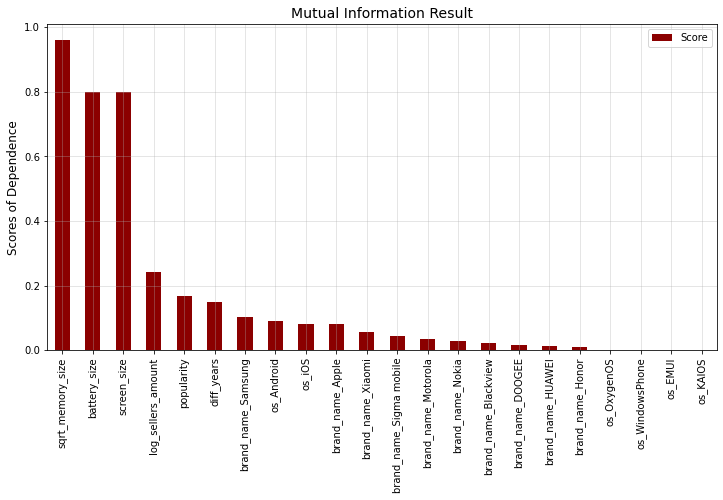

In [132]:
# plotting the scores:
sort_mi_df = mi_df.sort_values(by='Score', ascending=False)
sort_mi_df.plot(kind='bar', color='darkred', figsize=(12, 6))
plt.grid(True, alpha=0.4)
plt.title('Mutual Information Result', fontsize=14)
plt.ylabel('Scores of Dependence', fontsize=12)
plt.savefig('Feature Selection using Mutual Information')

In [133]:
# choosing the features which have large enough score:
sig_feats_mi = set(sort_mi_df[:12].index)

In [134]:
# considering union of the features selected through both the techniques:
final_ind_feats = sig_feats_mi.union(sig_feats_freg)
final_ind_feats

{'battery_size',
 'brand_name_Apple',
 'brand_name_HUAWEI',
 'brand_name_Nokia',
 'brand_name_Samsung',
 'brand_name_Sigma mobile',
 'brand_name_Xiaomi',
 'diff_years',
 'log_sellers_amount',
 'os_Android',
 'os_EMUI',
 'os_iOS',
 'popularity',
 'screen_size',
 'sqrt_memory_size'}

<p>We choose the best independent features from both the feature selection techniques which are found to be significant predictors and then we consider the union of the best features selected from both the feature selection techniques. This helps us to capture the best independent features and while running regression if any of the features are not significant predictors of the dependent feature, then simply we would remove them.</p>

<h3>On-Line Analytical Processing:</h3>

In [135]:
# preparing the data:
cmp_data_copy = cmp_data.copy()
cmp_data_copy['memory_size'] = cmp_data_copy['sqrt_memory_size']**2
cmp_data_copy['best_price'] = np.exp(cmp_data_copy['log_best_price'])
cmp_data_copy['sellers_amount'] = np.exp(cmp_data_copy['log_sellers_amount'])

<h4>1) Which Brand' phones have been sold maximum by the sellers?</h4>

In [136]:
tab_1 = cmp_data_copy.pivot_table(values='sellers_amount', 
                                  index=['brand_name'], 
                                  aggfunc=[sum])

tab_1.sort_values(by=('sum', 'sellers_amount'), ascending=False).head(10)

,sum
,sellers_amount
brand_name,
Apple,3870.0
Samsung,3093.0
Sigma mobile,1472.0
Xiaomi,1412.0
Nokia,904.0
Blackview,823.0
ZTE,738.0
Ulefone,639.0


<p>The table represents top 10 brands whose phones have been sold maximum by the seller whose data is being analysed. The sum corresponds to the amount of phones sold by the seller of that particular brand since the year 2013.</p>

<h4>2) Which Brand's phone seems to have the highest average price?</h4>

In [137]:
tab_2 = cmp_data_copy.pivot_table(values='best_price', 
                                  index=['brand_name'], 
                                  aggfunc=[np.mean, np.min, np.max, len])

# considering only those brands for which we have maximum data:
tab_2_sorted = tab_2.sort_values(by=('len', 'best_price'), ascending=False).head(10)
tab_2_sorted.sort_values(by=('mean', 'best_price'), ascending=False).head(10)

,mean,amin,amax,len
,best_price,best_price,best_price,best_price
brand_name,,,,
Apple,21214.836957,2445.000000,49242.0,92.0
Samsung,15029.611842,2344.000000,51460.0,152.0
HUAWEI,9469.613636,2598.000000,56082.0,44.0
Xiaomi,6070.862385,2358.000000,27999.0,109.0
Motorola,6001.967742,2243.000000,22760.0,62.0
Blackview,5245.452381,992.000000,12667.0,42.0
Honor,4763.848485,2499.000000,10865.0,33.0
DOOGEE,3921.648649,1844.000000,8904.0,37.0


<p>We have maximum data belonging to the brand names as can be observed from the table. That is the reason for these brands, significant correlation was observed and also the mutual info score was also large enough. The table corresponds to the average best price of each brands where only top 10 brands(based upon the data) have been chosen.</p>

<h4>2) Which Brand's phone seems to have the highest popularity?</h4>

In [138]:
tab_2 = cmp_data_copy.pivot_table(values='popularity', 
                                  index=['brand_name'], 
                                  aggfunc=[np.mean, len])

# considering only those brands for which we have maximum data:
tab_2_sorted = tab_2.sort_values(by=('len', 'popularity'), ascending=False).head(10)
tab_2_sorted.sort_values(by=('mean', 'popularity'), ascending=False).head(10)

,mean,len
,popularity,popularity
brand_name,,
Apple,0.716361,92.0
Xiaomi,0.656675,109.0
Samsung,0.568923,152.0
HUAWEI,0.550524,44.0
Blackview,0.514745,42.0
Nokia,0.485951,46.0
Motorola,0.435958,62.0
Sigma mobile,0.372680,50.0


<p>Now, the table contains and sorts the brand names based upon the popularity of the top 10 brands(most frequent)</p>

<p>Now, the data is prepared for modelling and after performing all the data preprocessing and transformations steps, we can now proceed with modelling after scaling the data.</p>

<h2>Model Buidling</h2>

<h3>a) Multiple Linear Regression Model:</h3>

In [139]:
# After Feature Selection, we create the final independent features which we require for predicting log_best_price:
full_indep_data = cmp_ind_data[final_ind_feats]

Text(0.5, 1.0, 'Correlation among Independent Features')

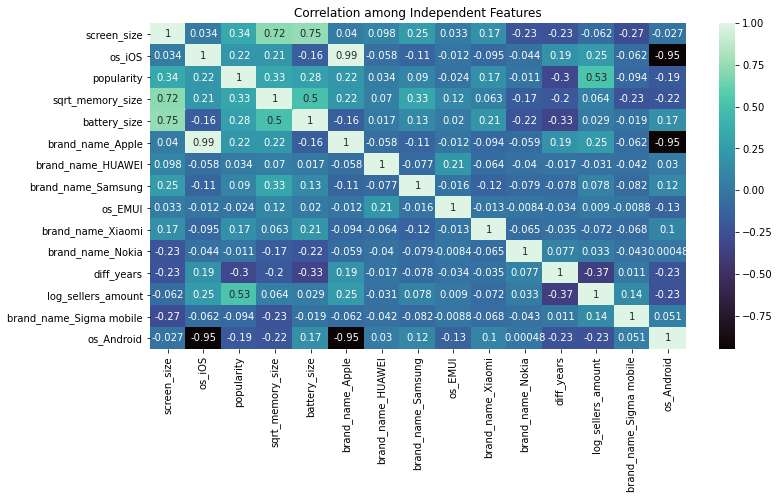

In [140]:
# final check on correlation among the independent features:
plt.figure(figsize=(12, 6))
indep_corr = full_indep_data.corr()
sns.heatmap(indep_corr, annot=True, cmap='mako')
plt.title('Correlation among Independent Features')

In [141]:
# Getting the pairs of indepenent features which have correlation higher than 0.7:

# Set of indep features which have correlation greater than 0.7 and overlooking this would definitely 
# results in Autocorrelation in errors and Multicollinearity:
highly_corr_feats(full_indep_data, threshold=0.65)

{'screen_size': 'battery_size',
 'os_iOS': 'brand_name_Apple',
 'sqrt_memory_size': 'screen_size',
 'battery_size': 'screen_size',
 'brand_name_Apple': 'os_iOS'}

<h4>Analysis of Multicollinearity:</h4>
<p>Screen_size and battery_size have correlation more than 0.7, which simply means, both the independent features have high correlation with respect to each other and even multicollinearity could affect the performance of model thus, we should remove 'screen_size' since it is highly correlated with 'sqrt_memory_size', else Multicollinearity would generate. Additionally, 'brand_name_Apple' and 'os_iOS' has correlation of 0.99 which means we need to get rid of either of them.</p>

In [142]:
# Removing the 'battery_size' and 'os_ios' since it might result in multicollinearity of data:
full_indep_data = full_indep_data.drop(['brand_name_Apple', 'screen_size'], axis=1)

In [143]:
# Creating the Training Data:
x_train = full_indep_data[:923]
y_train = target_data[:923]

# Creating the Test/Validation Data for evaluating the model:
x_val = full_indep_data[923:]
y_val = target_data[923:]

# printing the Shapes of Indep and Dep features for training and validation data:
print('Indep Features Shape of Training Data: {}, Dep Feature Shape: {}'.format(x_train.shape, y_train.shape))
print('Indep Features Shape of Validation Data: {}, Dep Feature Shape: {}'.format(x_val.shape, y_val.shape))

Indep Features Shape of Training Data: (923, 13), Dep Feature Shape: (923,)
Indep Features Shape of Validation Data: (241, 13), Dep Feature Shape: (241,)


In [144]:
# Training Regression Model using Statsmodels using Ordinary Least Squares:
import statsmodels.api as sm
reg_model = sm.OLS(y_train, x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         log_best_price   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              2495.
Date:                Mon, 17 May 2021   Prob (F-statistic):                        0.00
Time:                        12:28:06   Log-Likelihood:                          902.77
No. Observations:                 923   AIC:                                     -1780.
Df Residuals:                     910   BIC:                                     -1717.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
os_iOS                      0.2062      0.094      2.202      0.028       0.022       0.390
popularity                  0.0754      0.014      5.581      0.000       0.049       0.102
sqrt_memory_size            0.8770      0.026     33.723      0.000       0.826       0.928
battery_size                0.2081      0.019     11.147      0.000       0.171       0.245
brand_name_HUAWEI           0.0450      0.020      2.270      0.023       0.006       0.084
brand_name_Samsung          0.0878      0.009      9.553      0.000       0.070       0.106
os_EMUI                     0.0769      0.070      1.105      0.269      -0.060       0.213
brand_name_Xiaomi          -0.0189      0.010     -1.893      0.059      -0.039       0.001
brand_name_Nokia            0.0513      0.017      3.103      0.002       0.019       0.084
diff_years                  0.0808      0.020      4.025      0.000       0.041       0.120
log_sellers_amount         -0.0453      0.014     -3.285      0.001      -0.072      -0.018
brand_name_Sigma mobile     0.0464      0.021      2.228      0.026       0.006       0.087
os_Android                  0.1196      0.013      9.104      0.000       0.094       0.145
==============================================================================
Omnibus:                       33.476   Durbin-Watson:                   0.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.468
Skew:                          -0.011   Prob(JB):                     6.16e-20
Kurtosis:                       4.517   Cond. No.                         42.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4>Analysis of Regression Model:</h4>
<p><ol>
<li>The R-Squared seems to be really good and it seems that the independent features explain 97.7% variance of the target feature.</li>
    <li>Regression Model seems to be significant from the Prob(F-Statistic) and this means the model is significantly predicting the value of 'log_best_price'.</li>
    <li>There seems to be some of the independent features which are not significant predictors of the target feature. IT could be observed by looking at their p-values. The independent features which have p-value greater than 0.05 are the ones which are not the significant predictors of target feature.</li>
    <li><strong>Varibales which are not significant predictors of the target feature:</strong></li>
                <ul>
                <li>os_EMUI, p_value=0.546</li>
                <li>brand_name_Xiaomi, p_value=0.074</li>
                    <li>log_sellers_amount, p_value=0.073</li>
            </ul>
    <li>Since, the highest p_value is of os_EMUI, thus I would like to remove it first and see if the model has all the significant predictors and then slowly removing the rest of the non-significant features. </li>
    </ol></p>

In [148]:
from sklearn.metrics import mean_squared_error
# errors of training and validation:
def error(model, x_train, y_train, x_val, y_val, name):
    # making predictions on training and validation data:
    pred_train = model.predict(x_train)
    pred_val = model.predict(x_val)
    
    # computing mse on training and validation data:
    mse_train = mean_squared_error(y_train, pred_train)
    mse_val = mean_squared_error(y_val, pred_val)
    
    # print TRaining Error and Validation Error:
    print('Model Name -> ', name)
    print('Training Error -> ', mse_train)
    print('Validation Error -> ', mse_val)

# Computing Training and Validation error for the very first Regression Model:    
error(reg_model, x_train, y_train, x_val, y_val, 'First Regression Model')

Model Name ->  First Regression Model
Training Error ->  0.008278843250158423
Validation Error ->  0.01641980573116997


In [149]:
# After Removing the non-significant predictors of target feature:
x_train = x_train.drop(['os_EMUI', 'brand_name_Xiaomi'], axis=1)
x_val = x_val.drop(['os_EMUI', 'brand_name_Xiaomi'], axis=1)

In [150]:
x_train.columns

Index(['os_iOS', 'popularity', 'sqrt_memory_size', 'battery_size',
       'brand_name_HUAWEI', 'brand_name_Samsung', 'brand_name_Nokia',
       'diff_years', 'log_sellers_amount', 'brand_name_Sigma mobile',
       'os_Android'],
      dtype='object')

In [151]:
# Retraining Regression Model using Statsmodels using Ordinary Least Squares:
reg_model_final = sm.OLS(y_train, x_train).fit()
reg_model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         log_best_price   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              2939.
Date:                Mon, 17 May 2021   Prob (F-statistic):                        0.00
Time:                        12:35:20   Log-Likelihood:                          900.36
No. Observations:                 923   AIC:                                     -1779.
Df Residuals:                     912   BIC:                                     -1726.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
os_iOS                      0.2053      0.094      2.189      0.029       0.021       0.389
popularity                  0.0687      0.013      5.223      0.000       0.043       0.094
sqrt_memory_size            0.8827      0.026     34.365      0.000       0.832       0.933
battery_size                0.2047      0.019     11.062      0.000       0.168       0.241
brand_name_HUAWEI           0.0540      0.019      2.823      0.005       0.016       0.092
brand_name_Samsung          0.0902      0.009      9.952      0.000       0.072       0.108
brand_name_Nokia            0.0538      0.017      3.258      0.001       0.021       0.086
diff_years                  0.0810      0.020      4.056      0.000       0.042       0.120
log_sellers_amount         -0.0404      0.014     -2.964      0.003      -0.067      -0.014
brand_name_Sigma mobile     0.0491      0.021      2.361      0.018       0.008       0.090
os_Android                  0.1184      0.013      9.172      0.000       0.093       0.144
==============================================================================
Omnibus:                       34.976   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.134
Skew:                          -0.009   Prob(JB):                     2.20e-21
Kurtosis:                       4.573   Cond. No.                         42.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# Evaluation function for evaluating each Regression Model: 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

def evaluation(model, title, x_val=x_val, y_val=y_val, acf=False):
    
    # predicting 'log_best_price' for validation set:
    y_pred_val = model.predict(x_val)
    residuals = (y_val-y_pred_val)
    
    # setting the axes:
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))
    
    # Plotting the Predicted and Actual Values of Target Values:
    axs[0, 0].scatter(y_val, y_pred_val, color='darkred')
    axs[0, 0].plot([min(y_val), max(y_val)], [min(y_pred_val), max(y_pred_val)], color='blue', label='Ideal', linewidth=3)
    axs[0, 0].grid(True, alpha=0.4)
    axs[0, 0].set_xlabel('Actual Target Values', fontsize=12)
    axs[0, 0].set_ylabel('Predicted Target Values', fontsize=12)
    axs[0, 0].set_title(title, fontsize=14)
    axs[0, 0].legend()
    
    # Assumption 1:normality of Residuals: 
    sns.distplot(residuals, ax=axs[0, 1], color='darkred')
    axs[0, 1].grid(True, alpha=0.4)
    axs[0, 1].set_xlabel('Residuals', fontsize=12)
    axs[0, 1].set_title('Normality of Residuals', fontsize=14)
    
    # Assumption 2: homoscedasticity of residuals:
    axs[1, 0].scatter(y_pred_val, residuals, color='darkred')
    axs[1, 0].grid(True, alpha=0.4)
    axs[1, 0].hlines(y=0, xmin=min(y_pred_val) ,xmax=max(y_pred_val), color='black', linewidth=2)
    axs[1, 0].set_xlabel('Predicted Values of Validation Data', fontsize=12)
    axs[1, 0].set_ylabel('Residuals', fontsize=12)
    axs[1, 0].set_title('Homoscedasticity of Residuals', fontsize=14)
    
    # Assumption 3: AutoCorrelation of Residuals:
    if not acf:
        plot_pacf(residuals, ax=axs[1, 1], color='darkred')
        axs[1, 1].set_title('AutoCorrelation of Residuals', fontsize=14)
        axs[1, 1].grid(True, alpha=0.4)
        axs[1, 1].set_xlabel('Lags of Residuals', fontsize=12)
    
    else:
        plot_acf(residuals, ax=axs[1, 1], color='darkred')
        axs[1, 1].set_title('AutoCorrelation of Residuals', fontsize=14)
        axs[1, 1].grid(True, alpha=0.4)
        axs[1, 1].set_xlabel('Lags of Residuals', fontsize=12)

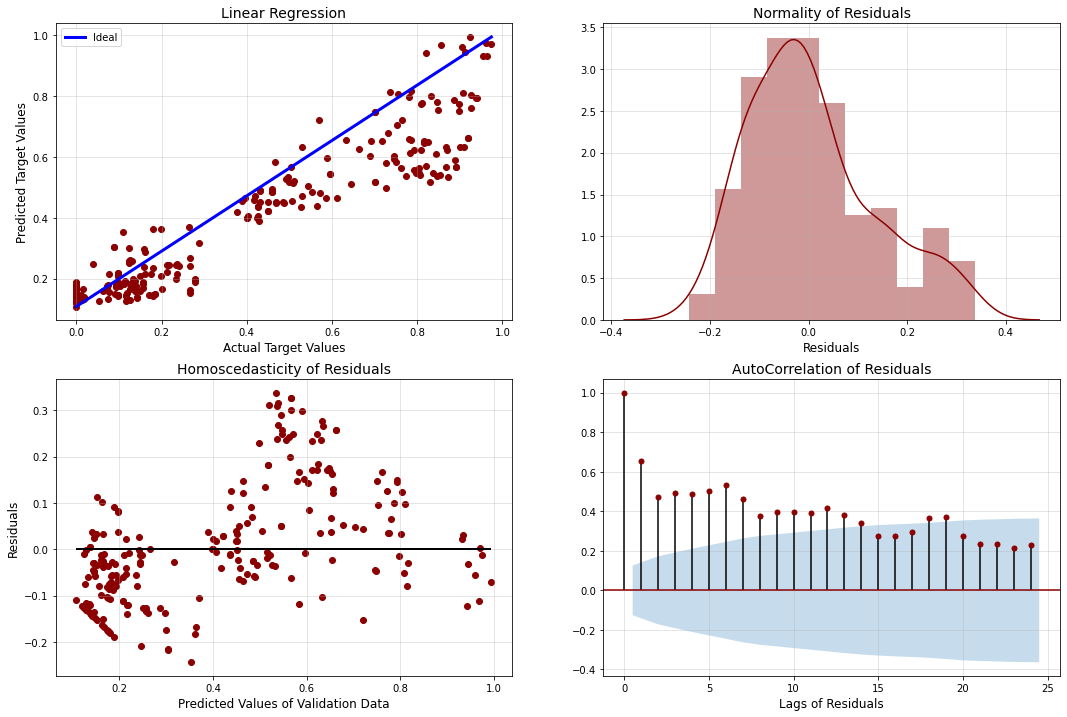

In [153]:
# evaluating Multiple Regression Model:
evaluation(reg_model_final, 'Linear Regression', acf=True)
plt.savefig('Result of Regression for all significant predictors')

<h4>Analysis of Assumptions Plot:</h4>
<p><ol>
    <li>The very first plot shows the plot scatter plot between the actual target values and the predicted target values. As shown , ideally we want the points to be as close as to the blue ideal line which resembles the ideal line.</li>
<li>2nd Plot of Normality shows that the residuals are normally distributed and hence the first assumption of 'Normality of Residuals' seems to be fulfilled.</li>
    <li>3nd Plot of Homoscedasticity shows that the residuals are not completely homoscedastic i.e. the values of residuals seem to vary for different values of Predicted Value. Ideally, we want the residuals to be randomly distributed and for all the independent features which are the function of predicted values and thus we simply plot residuals versus predicted values, we want the residuals to be randomly distributed. In our case, it can be observed that for smaller values of independent features (i.e. predicted value) the errors seem to be in negative and for higher values of independent features i.e. predicted values, the errors or residuals seems to be +ve and thus it means the residuals are not random. Thus our 2nd Assumption is violated. </li>
    <li>4th Plot of Autocorrelation shows that the lagged values of residulas are dependent on other lagged values as can be reflected from the spikes which  and thus it means autocorrelation exists while ideally we want no autocorrelation among residuals to exist in our model. Thus, 3rd Assumption is also violated.</li>
    <li>Hence, this model does not seem to fulfill all 3 assumptions of Linear Regression, thus we need to use some different Regression Algorithm.</li>
</ol></p>

<h3>Dealing with AutoCorrelation:</h3>

In [154]:
# Creating copy of training and validation data:
x_train_copy = x_train.copy()
x_val_copy = x_val.copy()

# lagged version of y_train:
lagged_ver = y_train.shift(1)
lag_dep = lagged_ver.drop(index=0, axis='row')

# lagged version of validation data:
lagged_ver_val = y_val.shift(1)
lag_dep_val = lagged_ver_val.drop(index=923, axis='row') # since the data starts with index=923

x_train_copy = x_train_copy.drop(index=0, axis='row')
y_train_copy = y_train.drop(index=0, axis='row')
x_train_copy['lag_dep'] = lag_dep

x_val_copy = x_val_copy.drop(index=923, axis='row')
y_val_copy = y_val.drop(index=923, axis='row')
x_val_copy['lag_dep'] = lag_dep_val

In [155]:
# Trying to remove Autocorrelation:
# Retraining Regression Model using Statsmodels using Ordinary Least Squares:
reg_model_testing = sm.OLS(y_train_copy, x_train_copy).fit()
reg_model_testing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         log_best_price   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              3262.
Date:                Mon, 17 May 2021   Prob (F-statistic):                        0.00
Time:                        12:35:48   Log-Likelihood:                          986.01
No. Observations:                 922   AIC:                                     -1948.
Df Residuals:                     910   BIC:                                     -1890.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
os_iOS                      0.1746      0.085      2.043      0.041       0.007       0.342
popularity                  0.0529      0.012      4.389      0.000       0.029       0.076
sqrt_memory_size            0.7080      0.027     26.589      0.000       0.656       0.760
battery_size                0.1724      0.017     10.114      0.000       0.139       0.206
brand_name_HUAWEI           0.0409      0.017      2.344      0.019       0.007       0.075
brand_name_Samsung          0.0595      0.009      6.957      0.000       0.043       0.076
brand_name_Nokia            0.0356      0.015      2.356      0.019       0.006       0.065
diff_years                  0.0506      0.018      2.761      0.006       0.015       0.087
log_sellers_amount         -0.0448      0.012     -3.599      0.000      -0.069      -0.020
brand_name_Sigma mobile     0.0419      0.019      2.213      0.027       0.005       0.079
os_Android                  0.0662      0.012      5.355      0.000       0.042       0.090
lag_dep                     0.2677      0.019     13.741      0.000       0.230       0.306
==============================================================================
Omnibus:                       51.917   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.031
Skew:                           0.074   Prob(JB):                     4.02e-41
Kurtosis:                       5.196   Cond. No.                         45.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

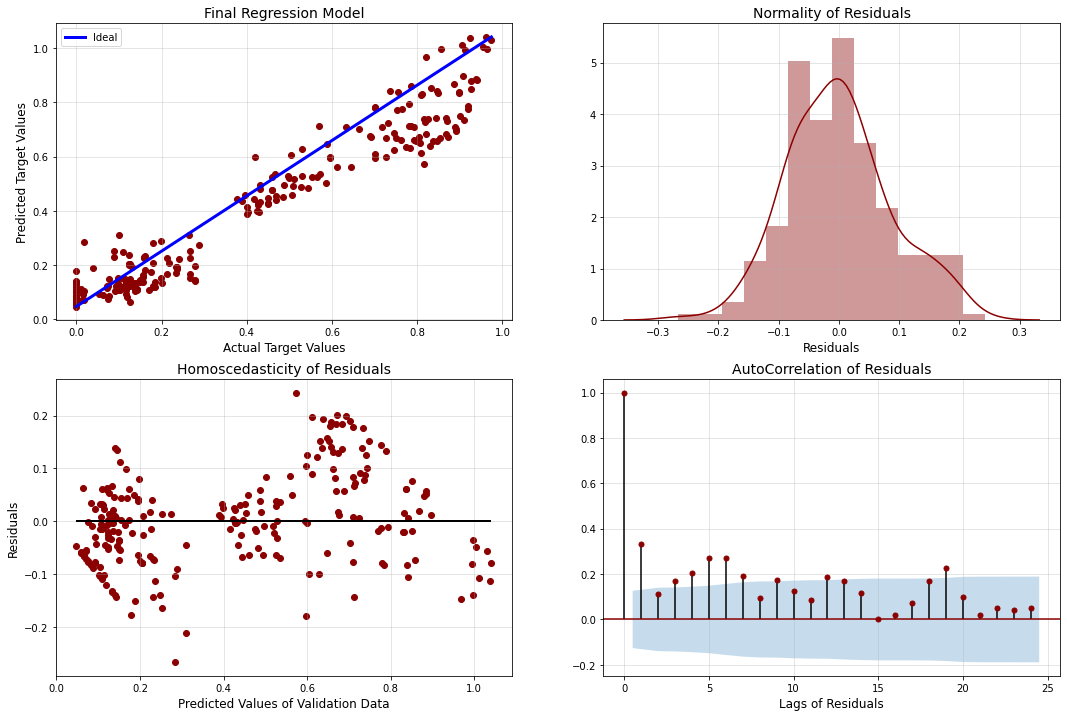

In [156]:
# evaluating the new regression model:
evaluation(x_val=x_val_copy, y_val=y_val_copy, model=reg_model_testing, title='Final Regression Model', acf=True)
plt.savefig("Final Tuned Regression Model's Results of assumptions of Linear Regression ")

In [157]:
# error on final regression model:
error(reg_model_testing, x_train_copy, y_train_copy, x_val_copy, y_val_copy, 'Final Regression Model')

Model Name ->  Final Regression Model
Training Error ->  0.006896552399667153
Validation Error ->  0.007555035785159838


In [166]:
# Proportion on improving the error:
def improve_perc(new, old, title):
    diff = abs(new - old)
    perc = (diff/old)*100
    print('Improvemnet in {} Error --> {}%'.format(title, perc))
    
train_new = 0.006896552399667153
val_new = 0.007555035785159838

train_bef = 0.008278843250158423
val_bef = 0.01641980573116997

In [167]:
# proportion of improving training error:
improve_perc(train_new, train_bef, 'Training')

Improvemnet in Training Error --> 16.696666535688045%


In [168]:
# proportion of improving validation error:
improve_perc(val_new, val_bef, 'Validation')

Improvemnet in Validation Error --> 53.98827544702313%


<h3>Analysis of New Regression Model:</h3>

<h3>Evaluating Overfitting of the Model:</h3>

In [178]:
# function which trains the LinerRegression on repetitively increased training data untill all the records are exhasted
# and simulataneously computes the rmse for training and validation data:

from sklearn.metrics import mean_squared_error
def compute_train_val_errors(model, x_train, y_train, x_val, y_val):
    train_error = []
    val_error = []
    for idx in range(1, len(x_train)):
        # creating the train data and target feature: 
        train_data = x_train[:idx]
        train_target = y_train[:idx]
        
        # fitting the data to the Linear Regression Model:
        model.fit(train_data, train_target)
        
        # Train Data Predictions and Root Mean Squared Error of Training Data:
        train_pred = model.predict(train_data)
        rmse_tr = np.sqrt(mean_squared_error(train_target, train_pred))
        train_error.append(rmse_tr)
        
        # Validation Data Predictions and Root Mean Squared Error of Validation Data:
        val_pred = model.predict(x_val[:idx])
        rmse_va = np.sqrt(mean_squared_error(y_val[:idx], val_pred))
        val_error.append(rmse_va)
        
    return train_error, val_error

In [179]:
# importing Linear Regression:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
train_error, val_error = compute_train_val_errors(lin_reg, x_train_copy, y_train_copy, x_val_copy, y_val_copy)

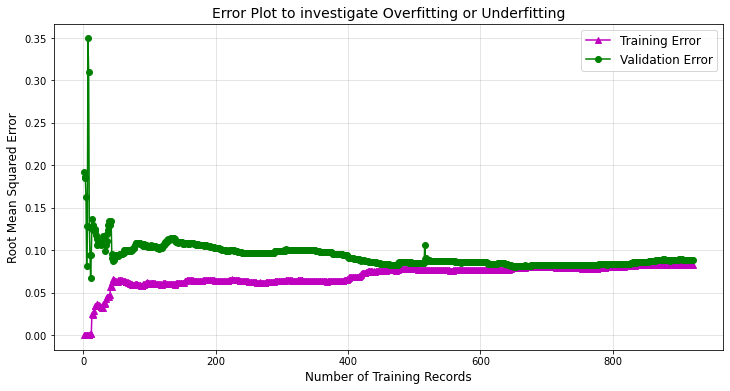

In [181]:
# plotting the Training and Validation Error:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(x_train_copy)), train_error[:], 'm-^', label='Training Error')
plt.plot(np.arange(1, len(x_train_copy)), val_error[:], 'g-o', label='Validation Error')
plt.grid(True, alpha=0.4)
plt.xlabel('Number of Training Records', fontsize=12)
plt.ylabel('Root Mean Squared Error', fontsize=12)
plt.title('Error Plot to investigate Overfitting or Underfitting', fontsize=14)
plt.legend(fontsize=12)
plt.savefig('Error Plot for inspceting Overfitting or Underfitting')

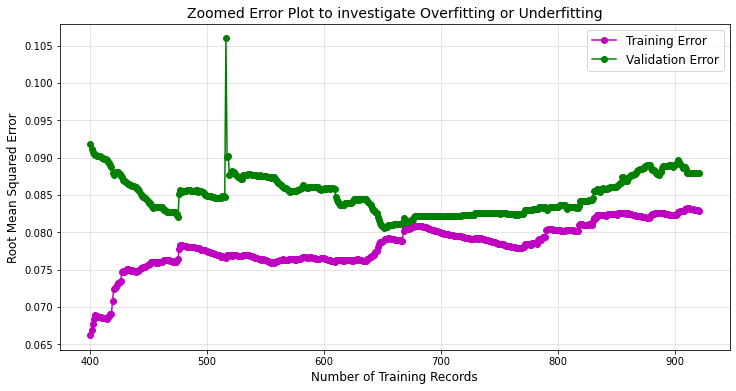

In [182]:
# replotting the Training and Validation Errors for larger number of traning records:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(400, len(x_train_copy)), train_error[399:], 'm-o', label='Training Error')
plt.plot(np.arange(400, len(x_train_copy)), val_error[399:], 'g-o', label='Validation Error')
plt.grid(True, alpha=0.4)
plt.xlabel('Number of Training Records', fontsize=12)
plt.ylabel('Root Mean Squared Error', fontsize=12)
plt.title('Zoomed Error Plot to investigate Overfitting or Underfitting', fontsize=14)
plt.legend(fontsize=12)
plt.savefig('Zoomed Error Plot for inspceting Overfitting')

<p>From the above plots of error, it can be easily observed that our multiple linear regression model is neither overfitting the data nor underfitting it. Let us dicuss it in a bit detail: 
<ul>
    <li>During the initial stages, when the number of training records were pretty less, then it seems that validation error is quite large where as training error seems to be less: it might be <strong>because we are making predictions on training data and since the model has learnt from training data only, thus it makes better predictions on it (since it is making predictions on the data which it has already seen during training)</strong>. As the number of training instances increases, the validation error also reduces since now, the model is being trained on more variety of data and thus the model generalizes well. <strong>However, when the model has been trained fully on all dataset, then the training error and validation error seems to be quite similar, which means the model now generalizes well on making predictions for unseen data.</strong></li>
    <li><strong>The model does not seem to get Overfitted on training data since the training error is quite close to validation error </strong>and this is the symbol for a model which generalizes well on test data.</li>
    <li><strong>The model does not seem to be underfitted since the error is pretty low for both training and validation error.</strong> Had the errors of Training and Validation Data been quite high, we could have interpreted that the model is underftting.</li>
    <li><strong>It can also be observed that during the initial time when model was trained on less number of records, validation error was pretty high and training error was pretty low which means initially the model was not generalizing well and thus was Overfitted but as the model kept on training on more and more data, it started generalizing well and by the time it gets trained on the whole training data, the generalization error has been reduced to a much lower value as can be observed from the above plots.</strong></li>
  </ul>
</p>

<h3>Prediction and Confidence Interval for Target Feature:</h3>
<p><strong>Confidence Intreval </strong>corresponds to the Average value of Target Feature for the population with 95% confidence i.e. for certain values fo independent feature, the average value of target feature would lie within that range.</p>
<p><strong>Prediction Interval </strong> corresonds to the Target Value for the population with 95% confidence.</p>

In [183]:
# for getting the Prediction and Confidence Interval of Target Feature: 
from statsmodels.stats.outliers_influence import summary_table

In [184]:
# Preprocessing the Column Names:
obj, values, columns = summary_table(reg_model_testing, alpha=0.05)
new_columns = [] # removing '\n' which was present in there:
for idx in range(len(columns)):
    elem = str(columns[idx]).replace('\n', ' ')
    new_columns.append(elem)
    
#pd.DataFrame(values, columns=columns)

In [185]:
# Creating the Summary Table which contains CI interval, PI interval and residuals diagnosis:
sum_table = pd.DataFrame(values, columns=new_columns) 
sum_table.head()

,Obs,Dep Var Population,Predicted Value,Std Error Mean Predict,Mean ci 95% low,Mean ci 95% upp,Predict ci 95% low,Predict ci 95% upp,Residual,Std Error Residual,Student Residual,Cook's D
0,1.0,0.317248,0.262259,0.008877,0.244837,0.279681,0.097351,0.427167,0.054989,0.083083,0.661856,0.000417
1,2.0,0.317248,0.264658,0.008973,0.247049,0.282267,0.099730,0.429586,0.052590,0.083073,0.633055,0.000390
2,3.0,0.317248,0.264139,0.009031,0.246416,0.281863,0.099199,0.429080,0.053109,0.083067,0.639348,0.000403
3,4.0,0.337745,0.373244,0.015674,0.342482,0.404006,0.206398,0.540090,-0.035499,0.082073,-0.432528,0.000569
4,5.0,0.674000,0.429495,0.005987,0.417746,0.441244,0.265089,0.593900,0.244506,0.083341,2.933781,0.003701


In [186]:
# summary table sorted by 'predicted value of sample':
ord_sum_table = sum_table.sort_values(by='Predicted Value', ascending=True)
ord_sum_table.head()

,Obs,Dep Var Population,Predicted Value,Std Error Mean Predict,Mean ci 95% low,Mean ci 95% upp,Predict ci 95% low,Predict ci 95% upp,Residual,Std Error Residual,Student Residual,Cook's D
153,154.0,0.017172,0.080115,0.010379,0.059746,0.100485,-0.085130,0.245361,-0.062944,0.082909,-0.759189,0.000753
807,808.0,0.000000,0.089814,0.011100,0.068028,0.111599,-0.075612,0.255239,-0.089814,0.082816,-1.084501,0.001761
513,514.0,0.086061,0.096367,0.010157,0.076433,0.116301,-0.068825,0.261559,-0.010306,0.082937,-0.124264,0.000019
294,295.0,0.129038,0.097113,0.010218,0.077060,0.117167,-0.068094,0.262320,0.031925,0.082929,0.384966,0.000187
120,121.0,0.000000,0.100485,0.009560,0.081723,0.119246,-0.064570,0.265540,-0.100485,0.083008,-1.210549,0.001620


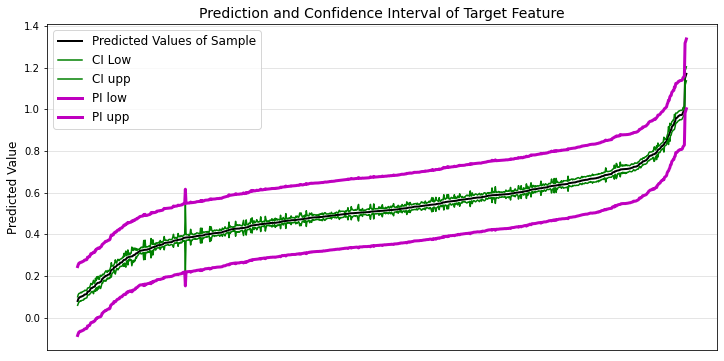

In [188]:
# plotting the Prediction and Confidence Interval:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# plotting the actual predictions:
ax.plot(np.arange(len(ord_sum_table)), ord_sum_table['Predicted Value'],'k-', label='Predicted Values of Sample', linewidth=2)

# plotting the Confidence Intervals which is the interval of average value of Target Feature:
ax.plot(np.arange(len(ord_sum_table)), ord_sum_table['Mean ci 95% low'], 'g-' , label='CI Low')
ax.plot(np.arange(len(ord_sum_table)), ord_sum_table['Mean ci 95% upp'], 'g-', label='CI upp')

# plotting the Prediction Intervals which is the interval of Target Feature within which the population target value seems to 
#lie with 95% confidence interval: 
ax.plot(np.arange(len(ord_sum_table)), ord_sum_table['Predict ci 95% low'], 'm-', label='PI low', linewidth=3)
ax.plot(np.arange(len(ord_sum_table)), ord_sum_table['Predict ci 95% upp'], 'm-', label='PI upp', linewidth=3)

# styling and labelling the plot:
ax.grid(True, alpha=0.4)
ax.set_xticks([])
ax.set_ylabel('Predicted Value', fontsize=12)
ax.set_title('Prediction and Confidence Interval of Target Feature', fontsize=14)
ax.legend(fontsize=12)
plt.savefig('Prediction and Confidence Interval')

<h3>Analysis of Above Plot:</h3>
<p><ol>
<li>The black line in the middle corresponds to the actual predicted values for the sample data.</li>
    <li>Green Line corresponds to the Confidence Interval, which is the average predicted value of the target feature. Since it is the average value, thus the interval is quite low as can be observed from the Green Line.</li>
    <li>Magenta Line in the upper and lower extremes corresponds to the Prediction Interval, which is the target value and for a particular record (values of independent feature) for population, the predicted value would range between this value.</li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
</ol></p>

### Used for Copy Paste
<h3>Analysis:</h3>
<p><ol>
<li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
</ol></p>